In [1]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

from datetime import datetime

from warnings import filterwarnings
filterwarnings("ignore")


# experiment variables
experiment_name = "simple_measure"

list_dataset = [
                "Lastfm",
                "Amazon-lb", 
                "QK-video",
                "Jester",
                "ML-10M",
                "ML-20M"
                ]

plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 600

# Bar plots

In [ ]:

chosen_rel = ["P", "MAP", "R", "NDCG"]
chosen_fair = ["Jain", "Ent", "Gini"]
chosen_joint = ['IBO', 'II-F', 'AI-F']

# plotting configs

col1, col2 = sns.color_palette("colorblind").as_hex()[:2]
sns.set_style("whitegrid")

y_min = -1
y_max = 1

Lastfm


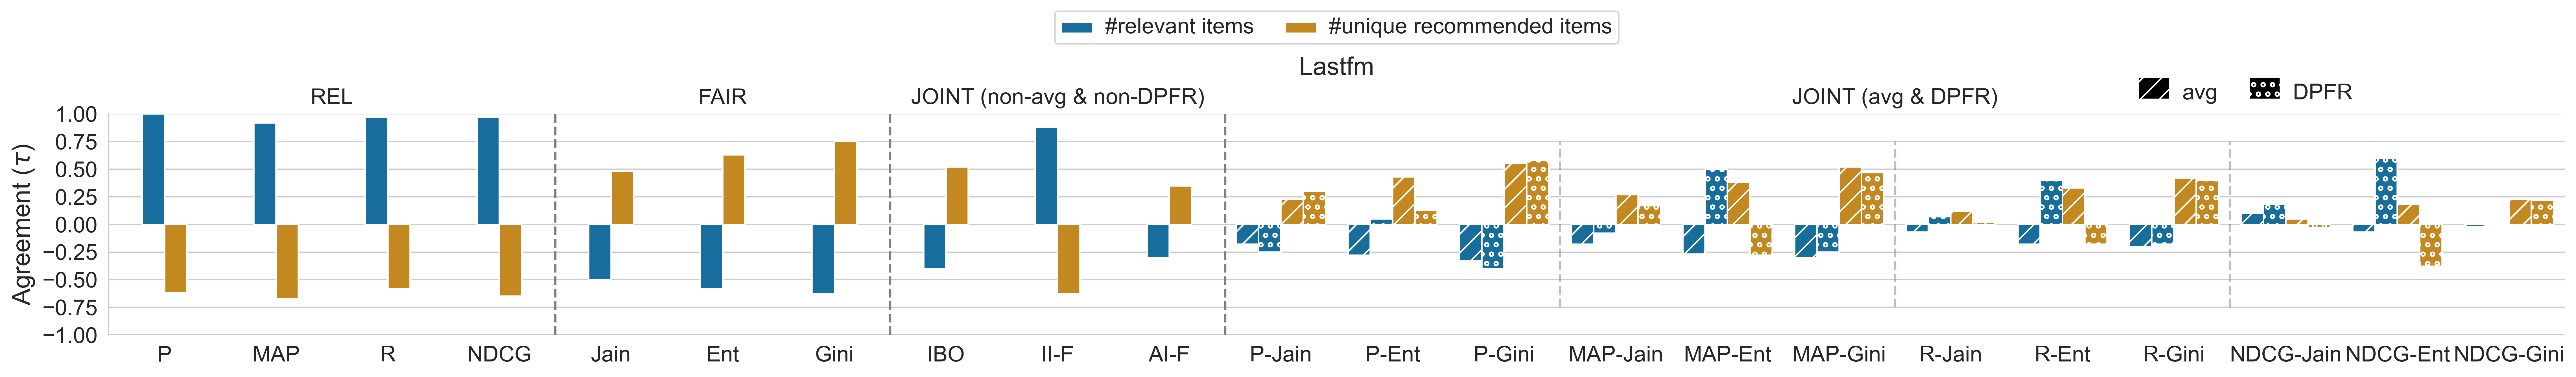

Amazon-lb


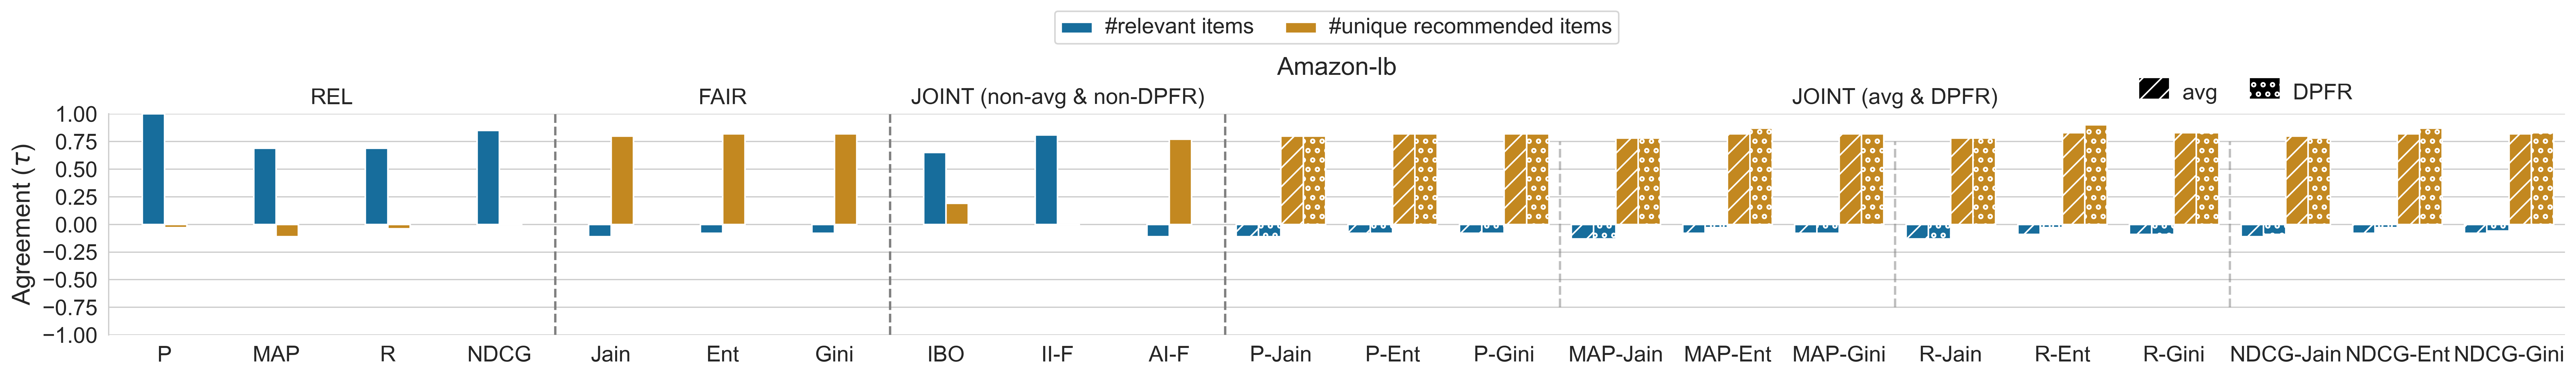

QK-video


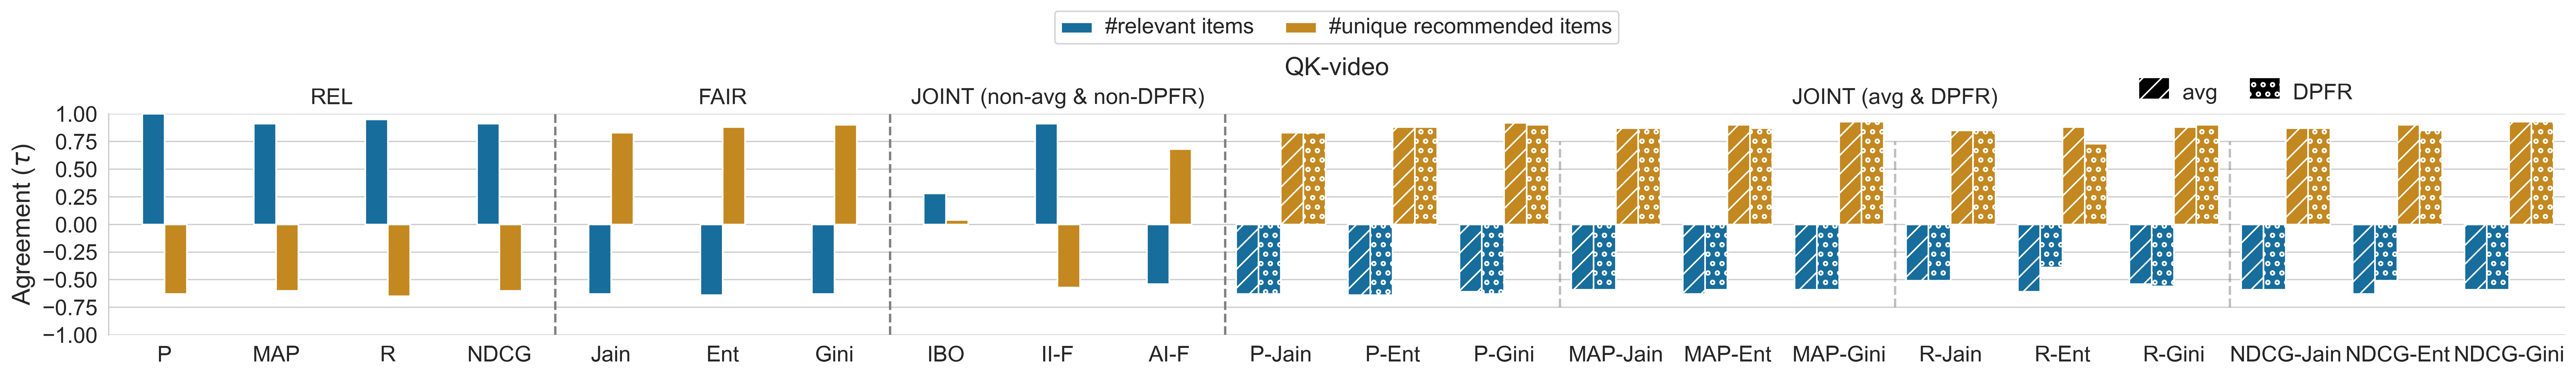

Jester


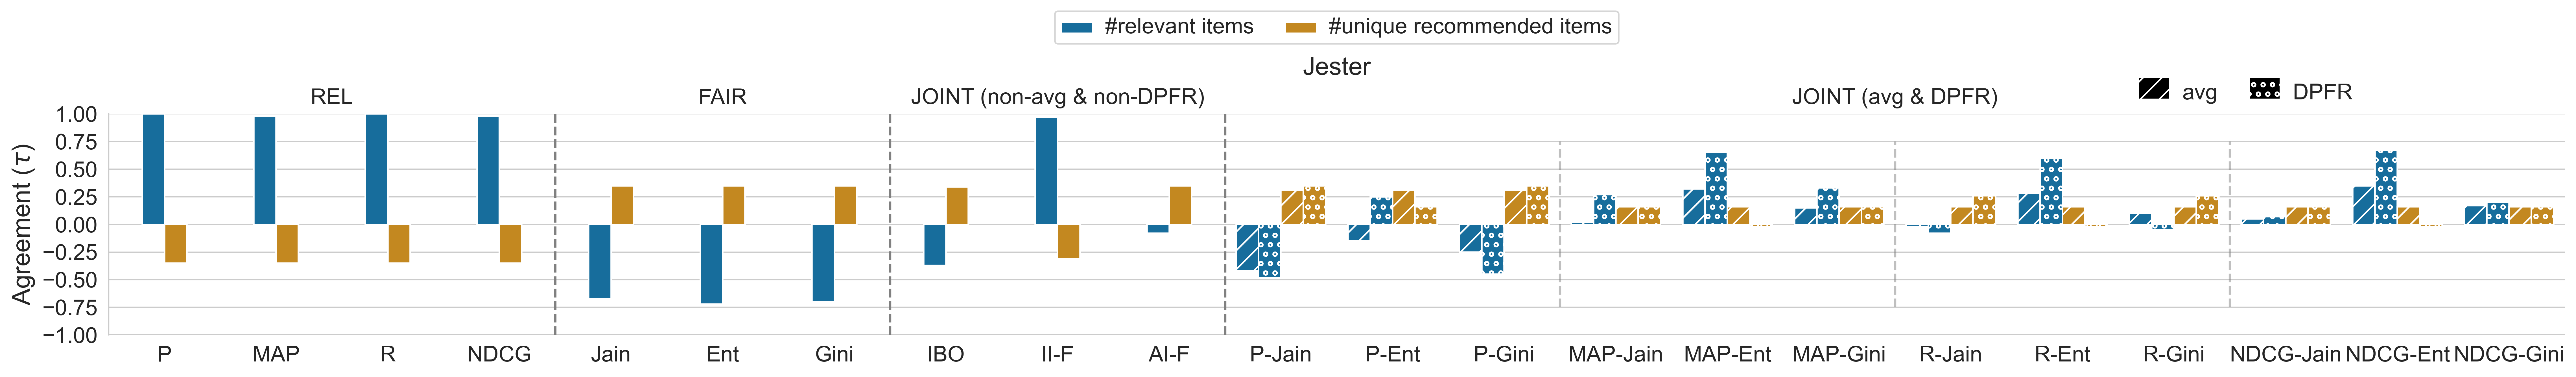

ML-10M


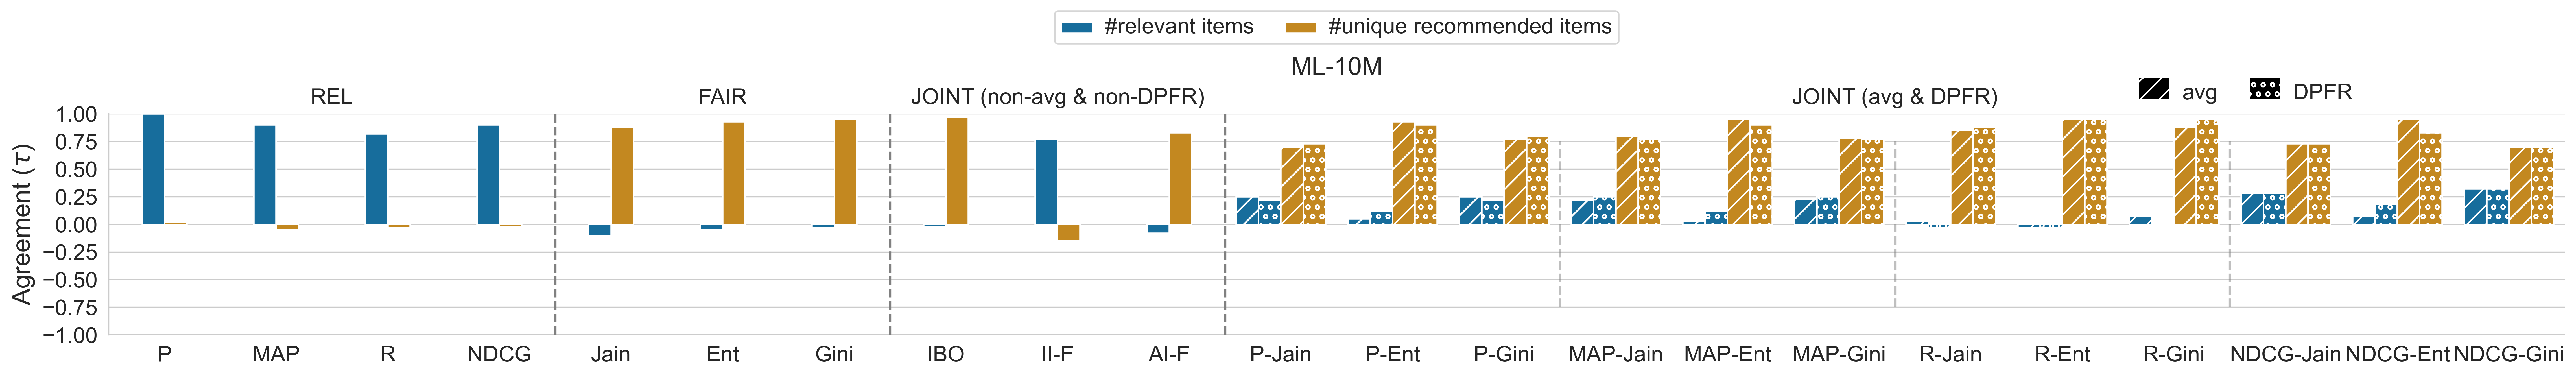

ML-20M


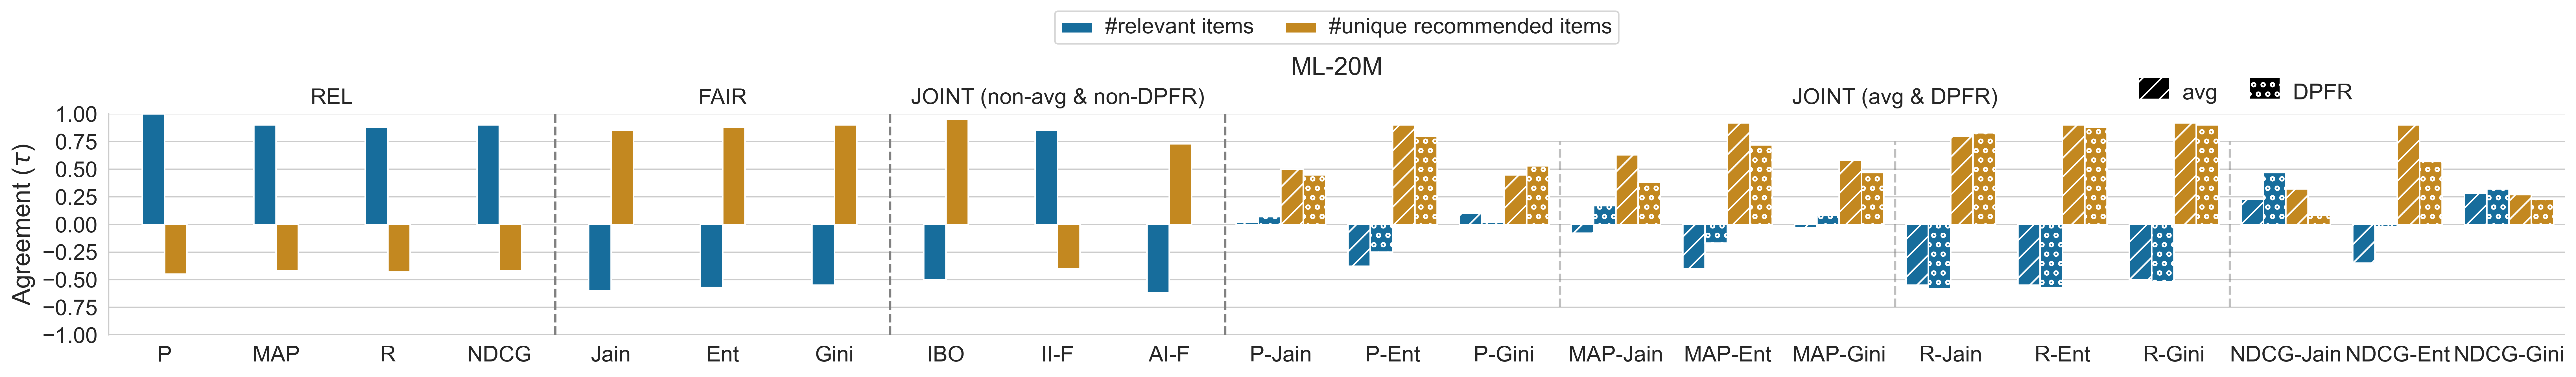

In [ ]:
for dataset in list_dataset:
    fig, ax = plt.subplots(figsize=(23,4))
    print(dataset)

    the_corr = pd.read_csv(f"{experiment_name}/corr_simple_measure_{dataset}.csv", index_col=0)

    the_corr_sliced = the_corr.loc[:,["num_rel_items","num_unique_rec_items",]]
    the_corr_sliced.index = the_corr_sliced.index.str.replace("_our|_ori|_true","", regex=True)

    

    chosen_joint = ["IBO", "II-F", "AI-F"]

    the_corr_avg = the_corr_sliced.loc[the_corr_sliced.index.str.contains("avg")].loc[[
                                                            "P-Jain-avg", "P-Ent-avg", "P-Gini-avg",
                                                            "MAP-Jain-avg", "MAP-Ent-avg", "MAP-Gini-avg",
                                                            "R-Jain-avg", "R-Ent-avg", "R-Gini-avg",
                                                            "NDCG-Jain-avg", "NDCG-Ent-avg", "NDCG-Gini-avg"
                                                            ]]
    the_corr_avg.columns = the_corr_avg.columns + "_AVG"


    the_corr_sliced_dpfr_half = the_corr_sliced.loc[the_corr_sliced.index.str.contains("0.5$")]
    the_corr_sliced_dpfr_half.index = the_corr_sliced_dpfr_half.index.str.replace("0.5","avg")
    the_corr_sliced_dpfr_half.columns = the_corr_sliced_dpfr_half.columns + "_DPFR"

    the_corr_combined = pd.concat([the_corr_avg, the_corr_sliced_dpfr_half], axis=1)
    the_corr_combined = the_corr_combined[["num_rel_items_AVG","num_rel_items_DPFR","num_unique_rec_items_AVG","num_unique_rec_items_DPFR"]]
    the_corr_combined = the_corr_combined.reset_index().melt(id_vars="index")
    the_corr_combined["variant"] = the_corr_combined["variable"].apply(lambda x: "AVG" if "AVG" in x else "DPFR")

    sns.barplot(the_corr_sliced.loc[chosen_rel+chosen_fair+chosen_joint].reset_index().melt(id_vars="index"),
                x="index",
                y="value",
                hue="variable",
                palette="colorblind",
                width=0.4,
                ax=ax
                )

    sns.barplot(the_corr_combined,
                x="index",
                y="value",
                hue="variable",
                palette=[col1, col1, col2, col2],
                ax=ax
                )


    #remove top, right, bottom spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)


    # add text labels for groups
    ax.text(len(chosen_rel)/2 - 0.5, y_max + 0.05, 'REL', ha='center', va='bottom', fontsize=14)
    ax.text(len(chosen_rel) + len(chosen_fair)/2 - 0.5, y_max + 0.05, 'FAIR', ha='center', va='bottom', fontsize=14)
    ax.text(len(chosen_rel) + len(chosen_fair) + len(chosen_joint)/2 - 0.5, y_max + 0.05, 'JOINT (non-avg & non-DPFR)', ha='center', va='bottom', fontsize=14)
    ax.text(len(chosen_rel) + len(chosen_fair) + len(chosen_joint) + 3*4/2 - 0.5, y_max + 0.05, 'JOINT (avg & DPFR)', ha='center', va='bottom', fontsize=14)

    # add vertical lines to separate groups
    ax.axvline(x=len(chosen_rel)-0.5, color='gray', linestyle='--')
    ax.axvline(x=len(chosen_rel)+len(chosen_fair)-0.5, color='gray', linestyle='--')

    len_non_avg_dpfr = len(chosen_rel) + len(chosen_fair) + len(chosen_joint)
    ax.axvline(x=len_non_avg_dpfr -0.5, color='gray', linestyle='--')
    ax.axvline(x=len_non_avg_dpfr + len(chosen_fair)-0.5, color='gray', linestyle='--', ymin=0.125, ymax=y_max-0.125, alpha=0.5)
    ax.axvline(x=len_non_avg_dpfr + len(chosen_fair)*2-0.5, color='gray', linestyle='--', ymin=0.125, ymax=y_max-0.125, alpha=0.5)
    ax.axvline(x=len_non_avg_dpfr + len(chosen_fair)*3-0.5, color='gray', linestyle='--', ymin=0.125, ymax=y_max-0.125, alpha=0.5)

    hatches = ["//", "oo"] *2
    # Loop over the bars
    for bars, hatch in zip(ax.containers[2:], hatches):
        # Set a different hatch for each group of bars
        for bar in bars:
            bar.set_hatch(hatch)


    # set y limits
    ax.set_ylim([y_min, y_max])

    # remove x-axis label
    ax.set_xlabel("")

    # remove "avg" from x-axis tick labels
    new_labels = [label.get_text().replace("-avg","") for label in ax.get_xticklabels()]
    ax.set_xticklabels(new_labels)

    # rename y-axis label
    ax.set_ylabel("Agreement ($\\tau$)", fontdict={'size': 16})

    # change y-tick labels to increments of 0.25:
    ax.set_yticks(np.arange(y_min, y_max+0.01, 0.25))

    # remove ticks on x axis
    ax.tick_params(axis='x', which='both', bottom=False)

    # increase font size of x-axis tick labels
    ax.tick_params(axis='both', labelsize=14)

    # === LEGEND === 

    # add fake legend for hatches,
    from matplotlib.patches import Patch
    hatch_legend_elements = [
        Patch(facecolor='black', edgecolor='white', hatch='//', label='avg'),
        Patch(facecolor='black', edgecolor='white', hatch='oo', label='DPFR')
    ]


    # add legend for hatches
    legend2 = ax.legend(handles=hatch_legend_elements, loc='upper center', bbox_to_anchor=(0.87, 1.2), ncol=3)

    # remove legend box border
    legend2.get_frame().set_edgecolor('white')

    # increase height of patch
    for patch in legend2.get_patches():
        patch.set_height(14)

    # increase fontsize of legend
    for text in legend2.get_texts():
        text.set_fontsize(14)

    ax.add_artist(legend2)

    # move legend to middle top
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=6)


    # get rid of other legend entries and handles
    handles, labels = ax.get_legend_handles_labels() 

    ax.legend(handles[:2], labels[:2], loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)

    #change legend variable names
    legend = ax.get_legend()
    legend.texts[0].set_text('#relevant items')
    legend.texts[1].set_text('#unique recommended items')

    # increase fontsize of legend
    for text in legend.get_texts():
        text.set_fontsize(14)


    # add dataset name to title of plot
    ax.set_title(f"{dataset}", fontsize=16, pad=25)

    plt.tight_layout()

    #save with timestamp and proper name
    now = datetime.now()
    time = str(now.strftime("%Y-%m-%d_%H%M%S"))
    plt.savefig(f"{experiment_name}/simple_measure_{dataset}_{time}.pdf", bbox_inches="tight")
    plt.show()

# Lineplot for varying alpha

In [2]:
from matplotlib.lines import Line2D

def separate_pair_alpha(the_corr):
    indices = np.asarray(the_corr.index.str.rsplit("-", n=1).to_list())

    the_corr["pair"] = indices[:,0]
    the_corr["alpha"] = indices[:,1]
    the_corr["alpha"] = the_corr["alpha"].astype(float)

    the_corr = the_corr.reset_index(drop=True)
    return the_corr

Lastfm


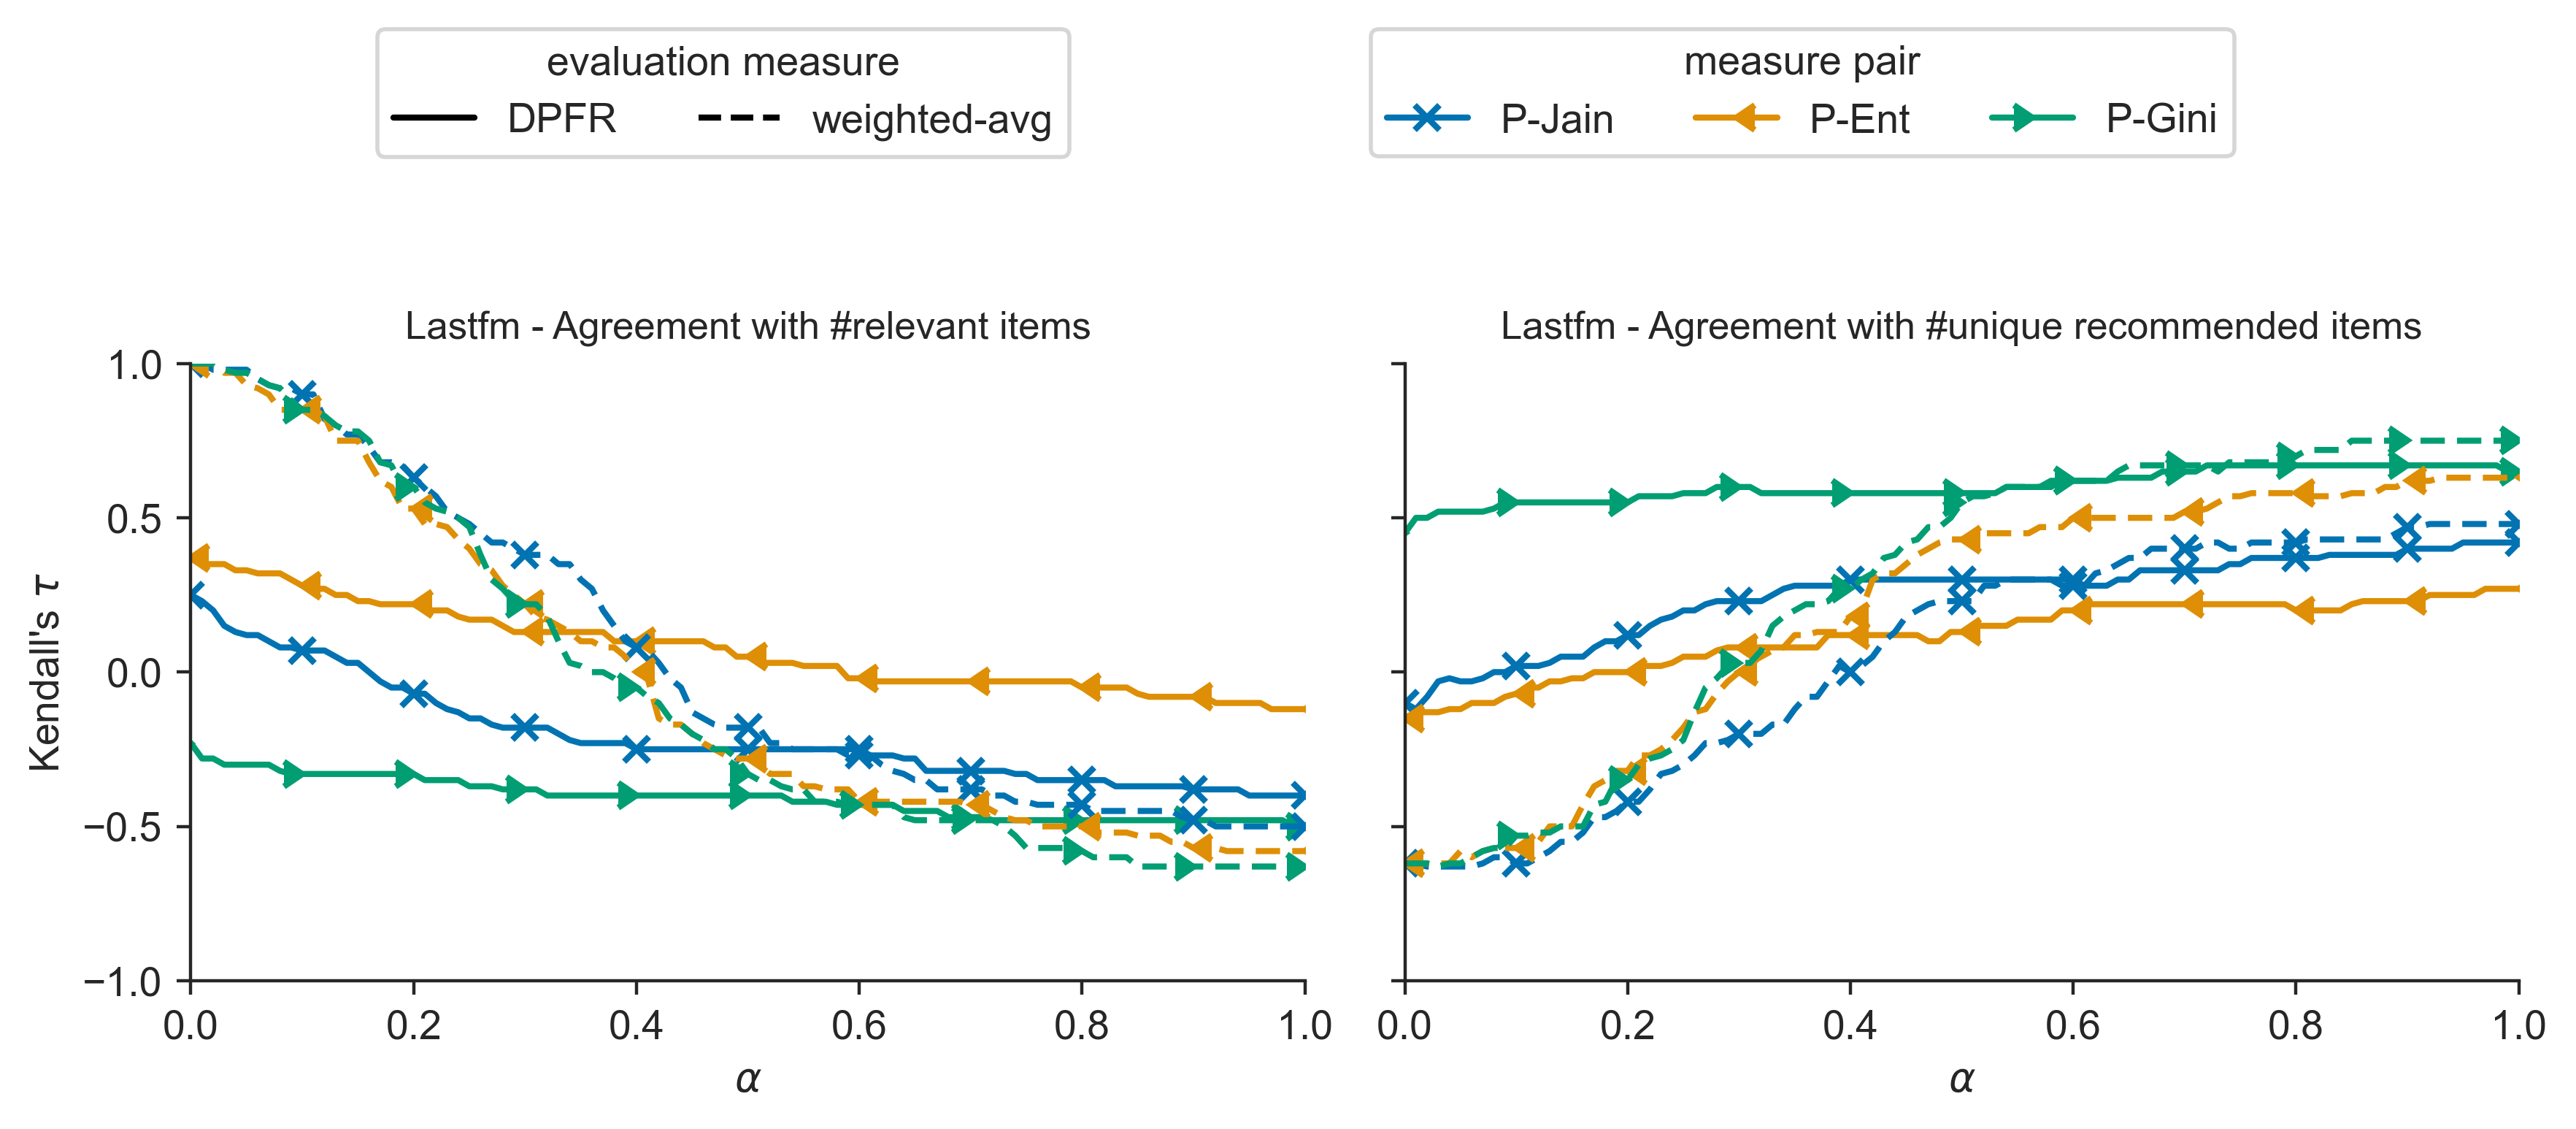

Amazon-lb


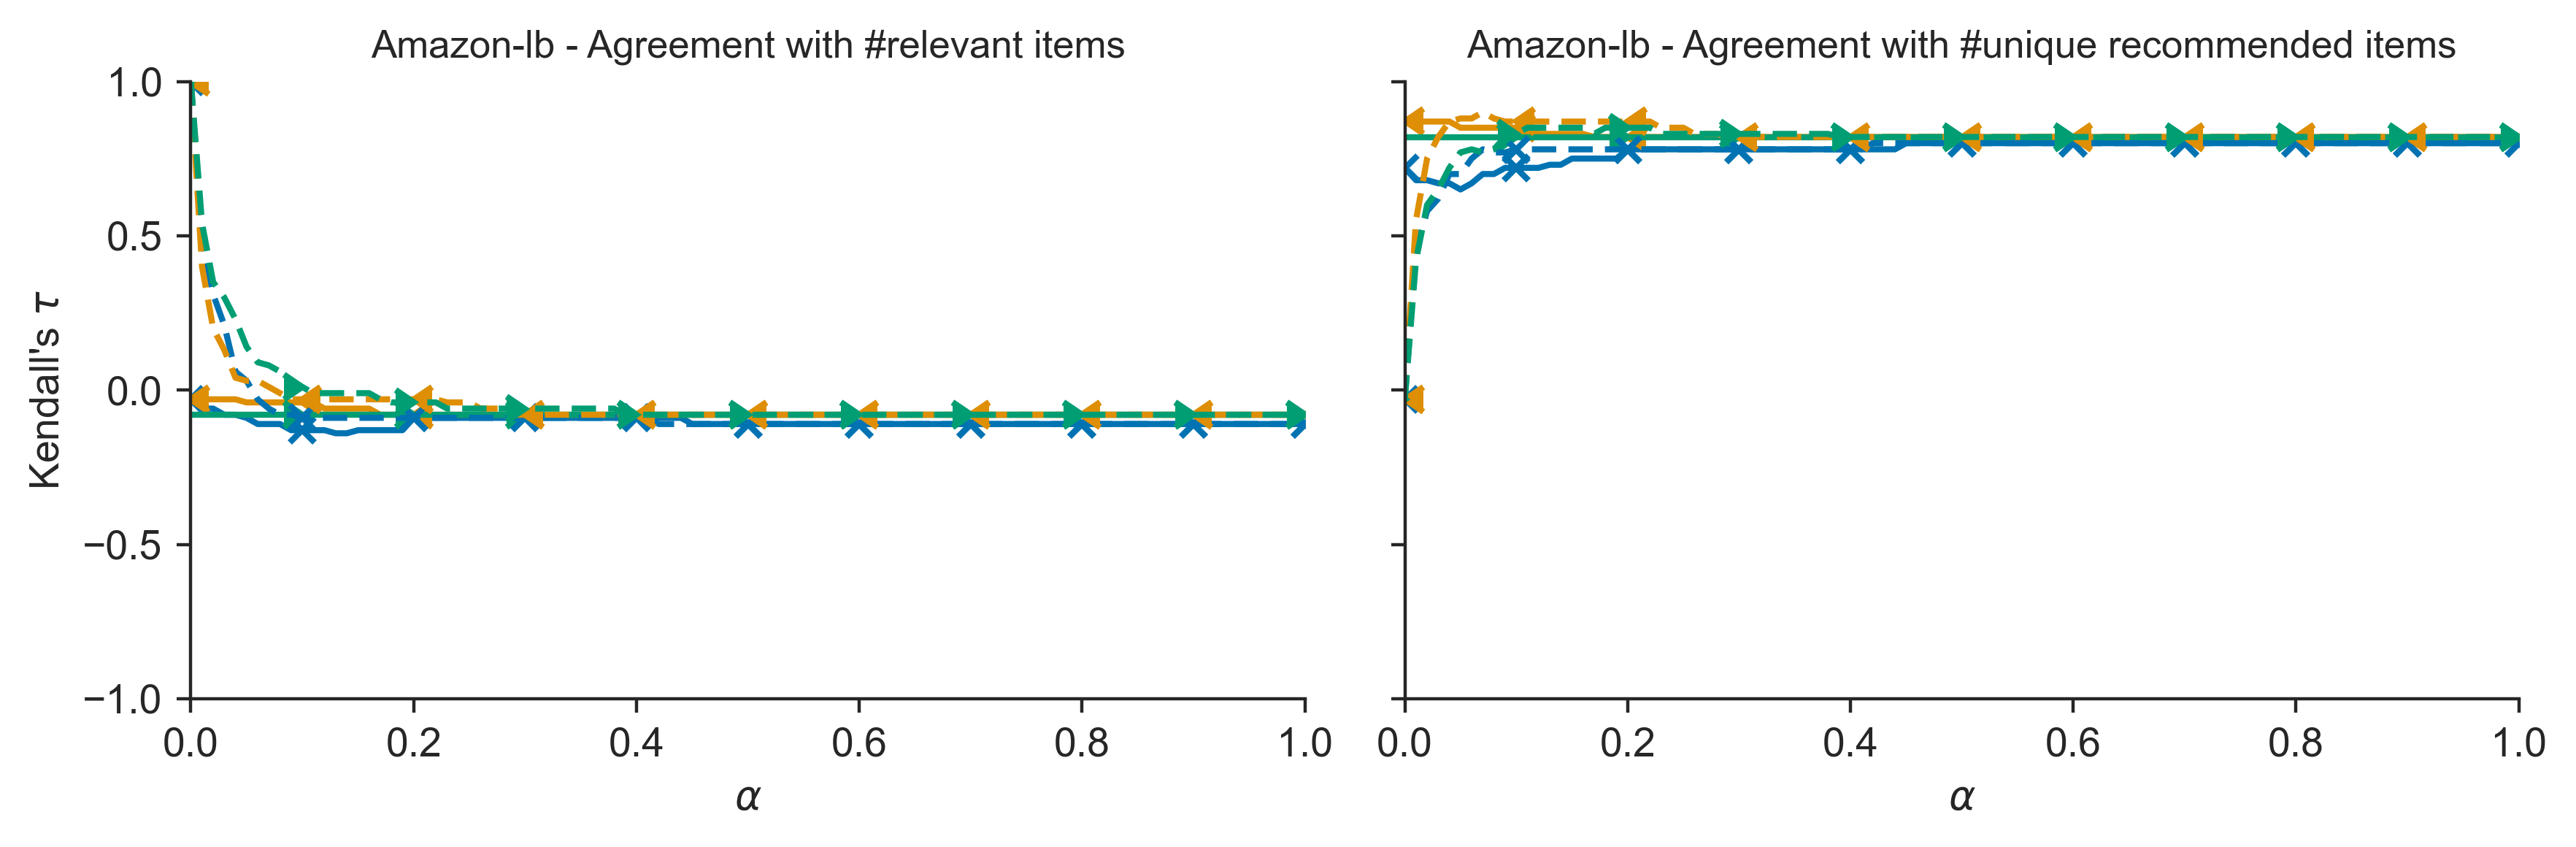

QK-video


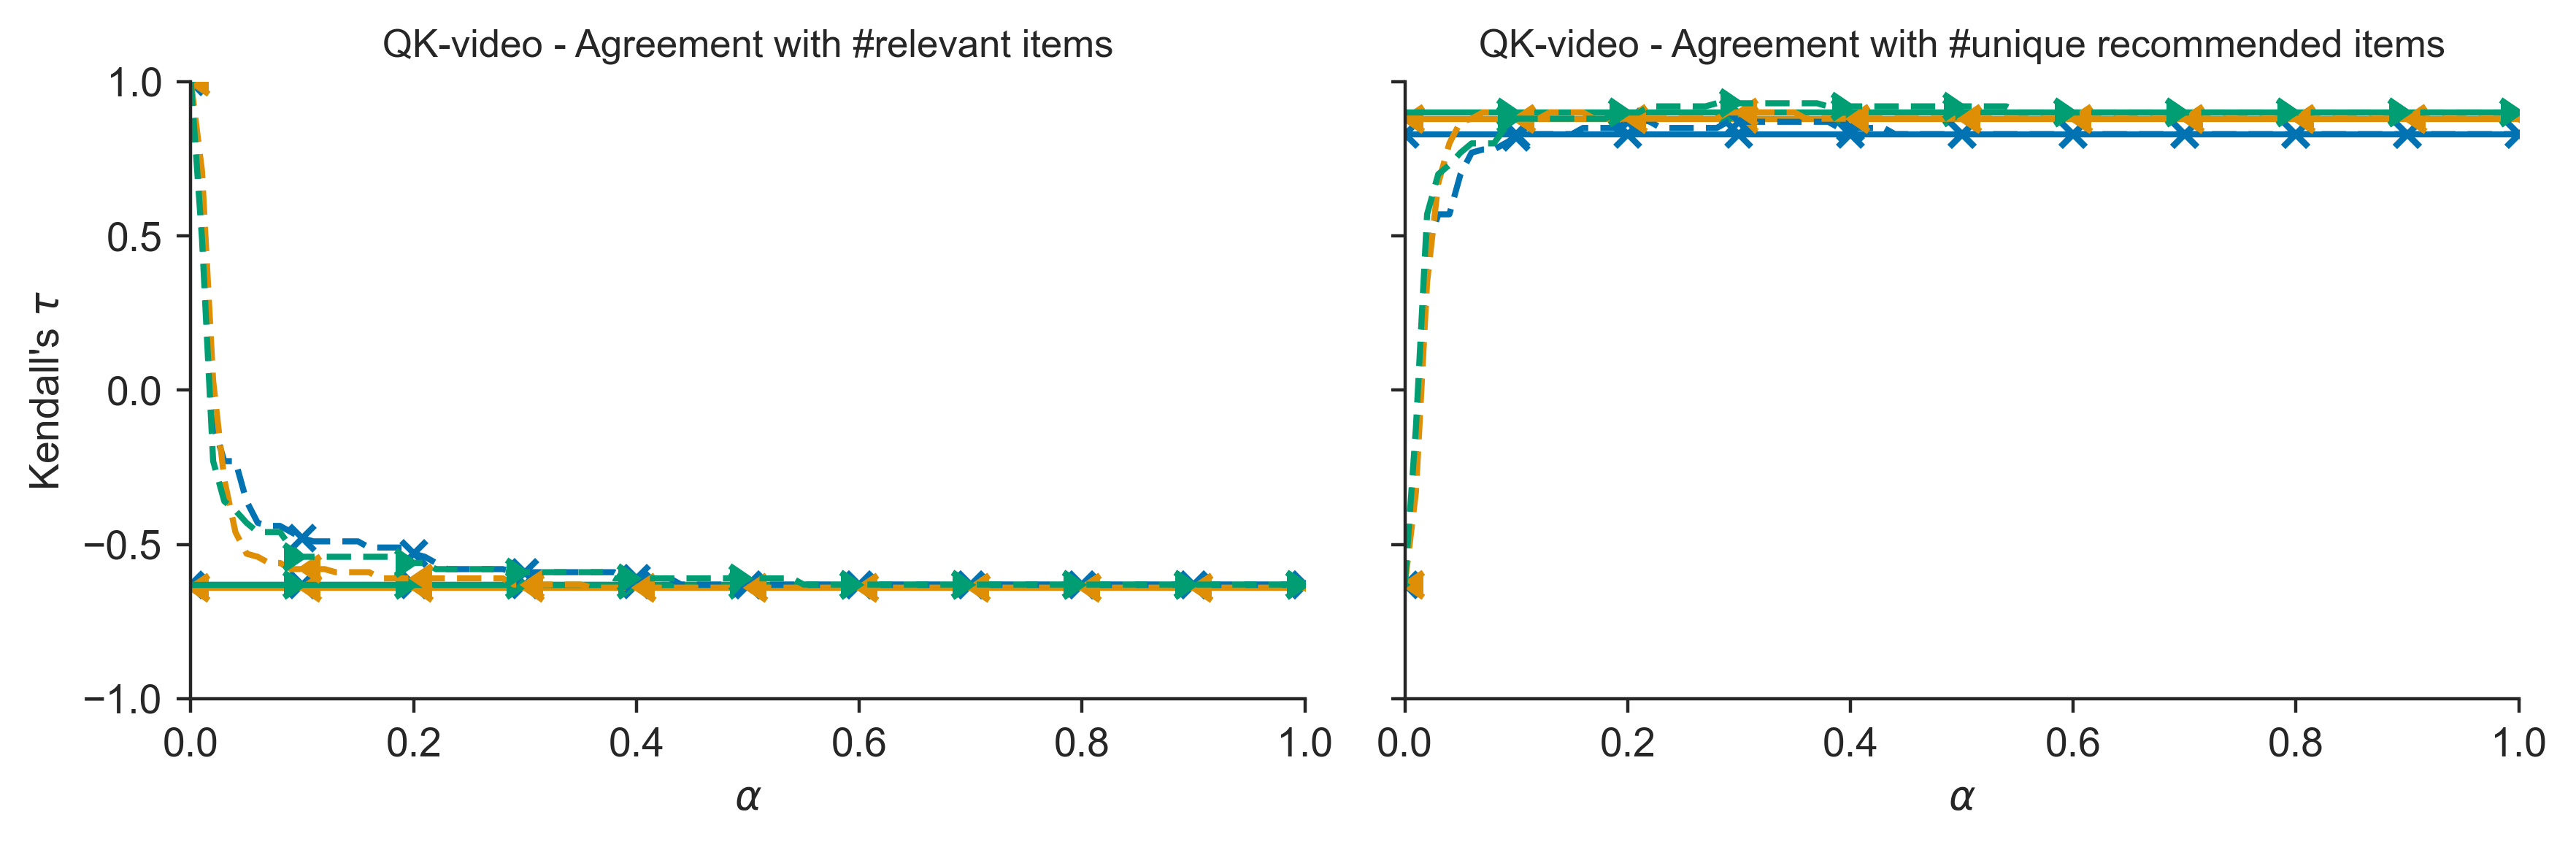

Jester


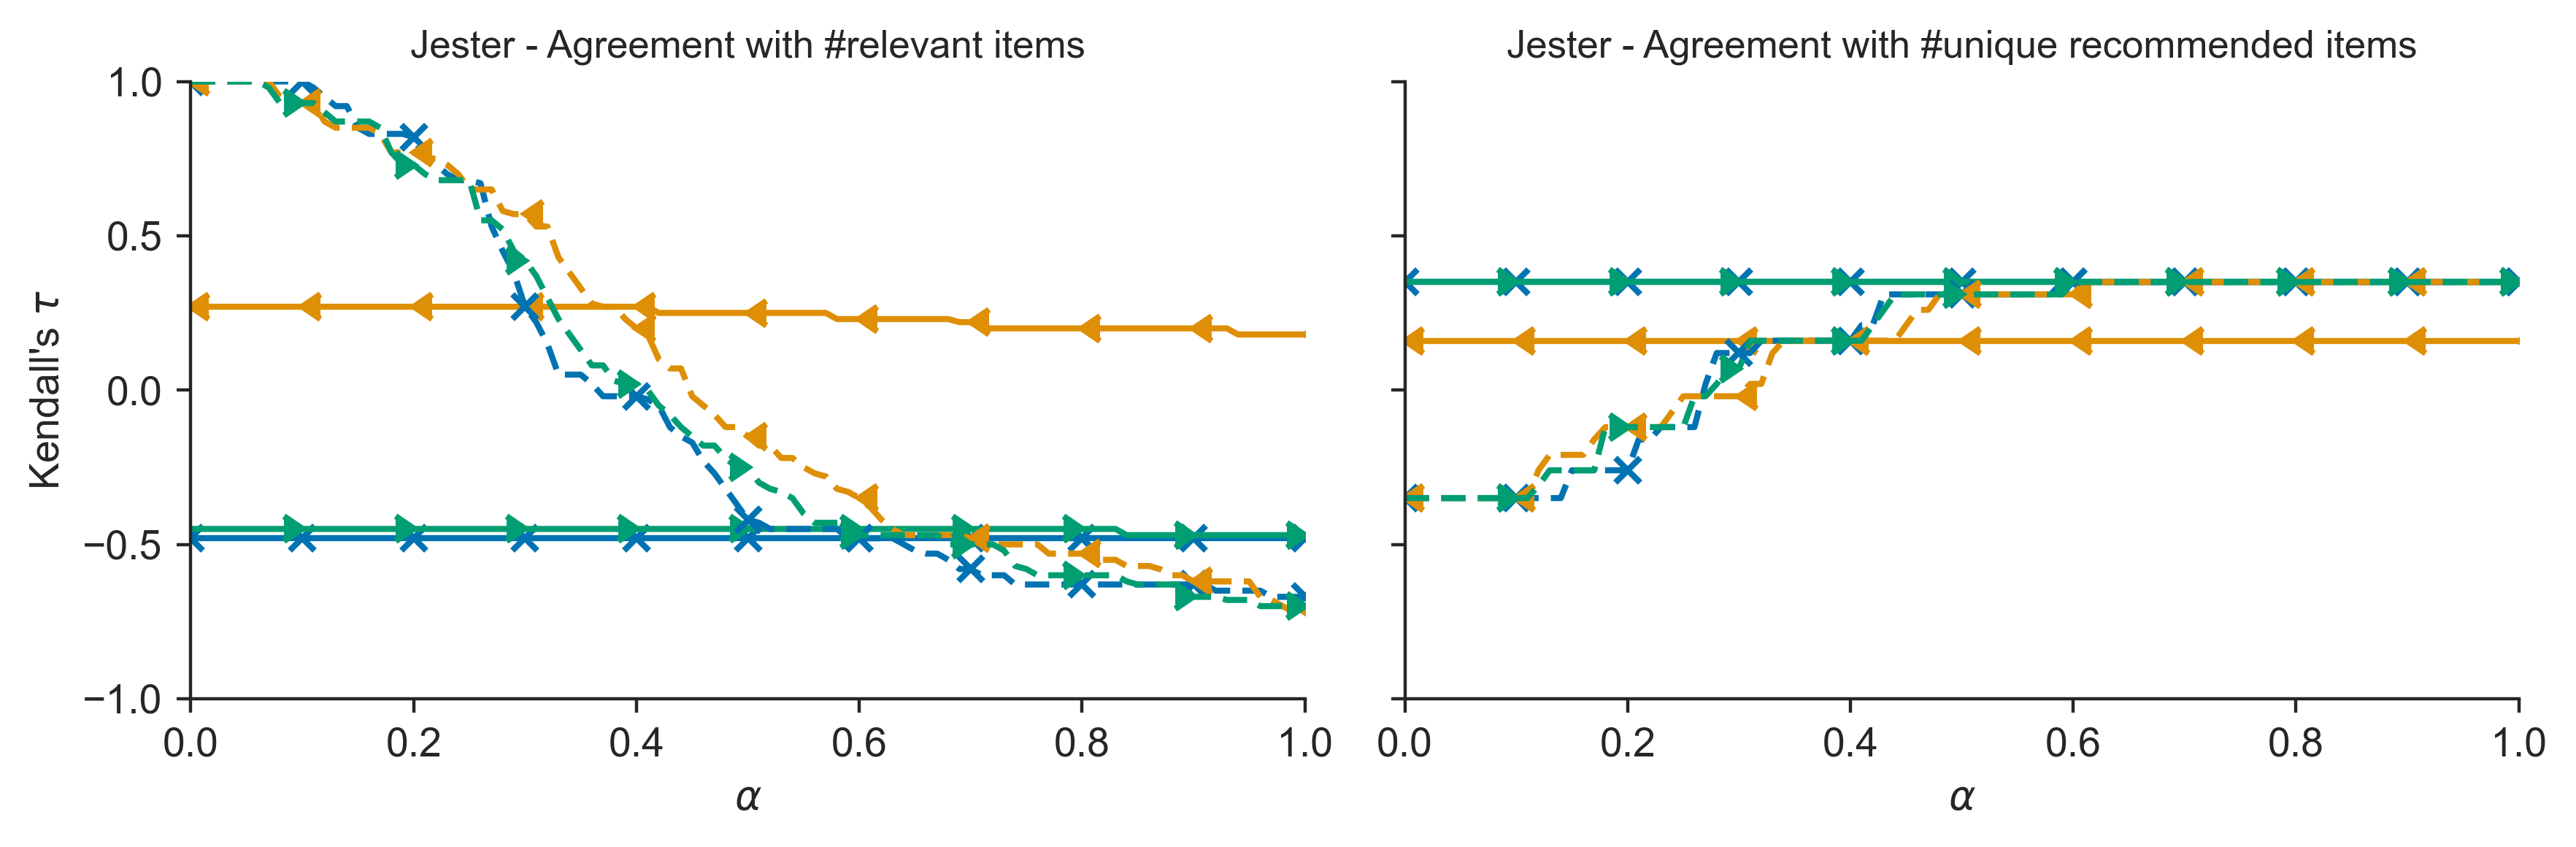

ML-10M


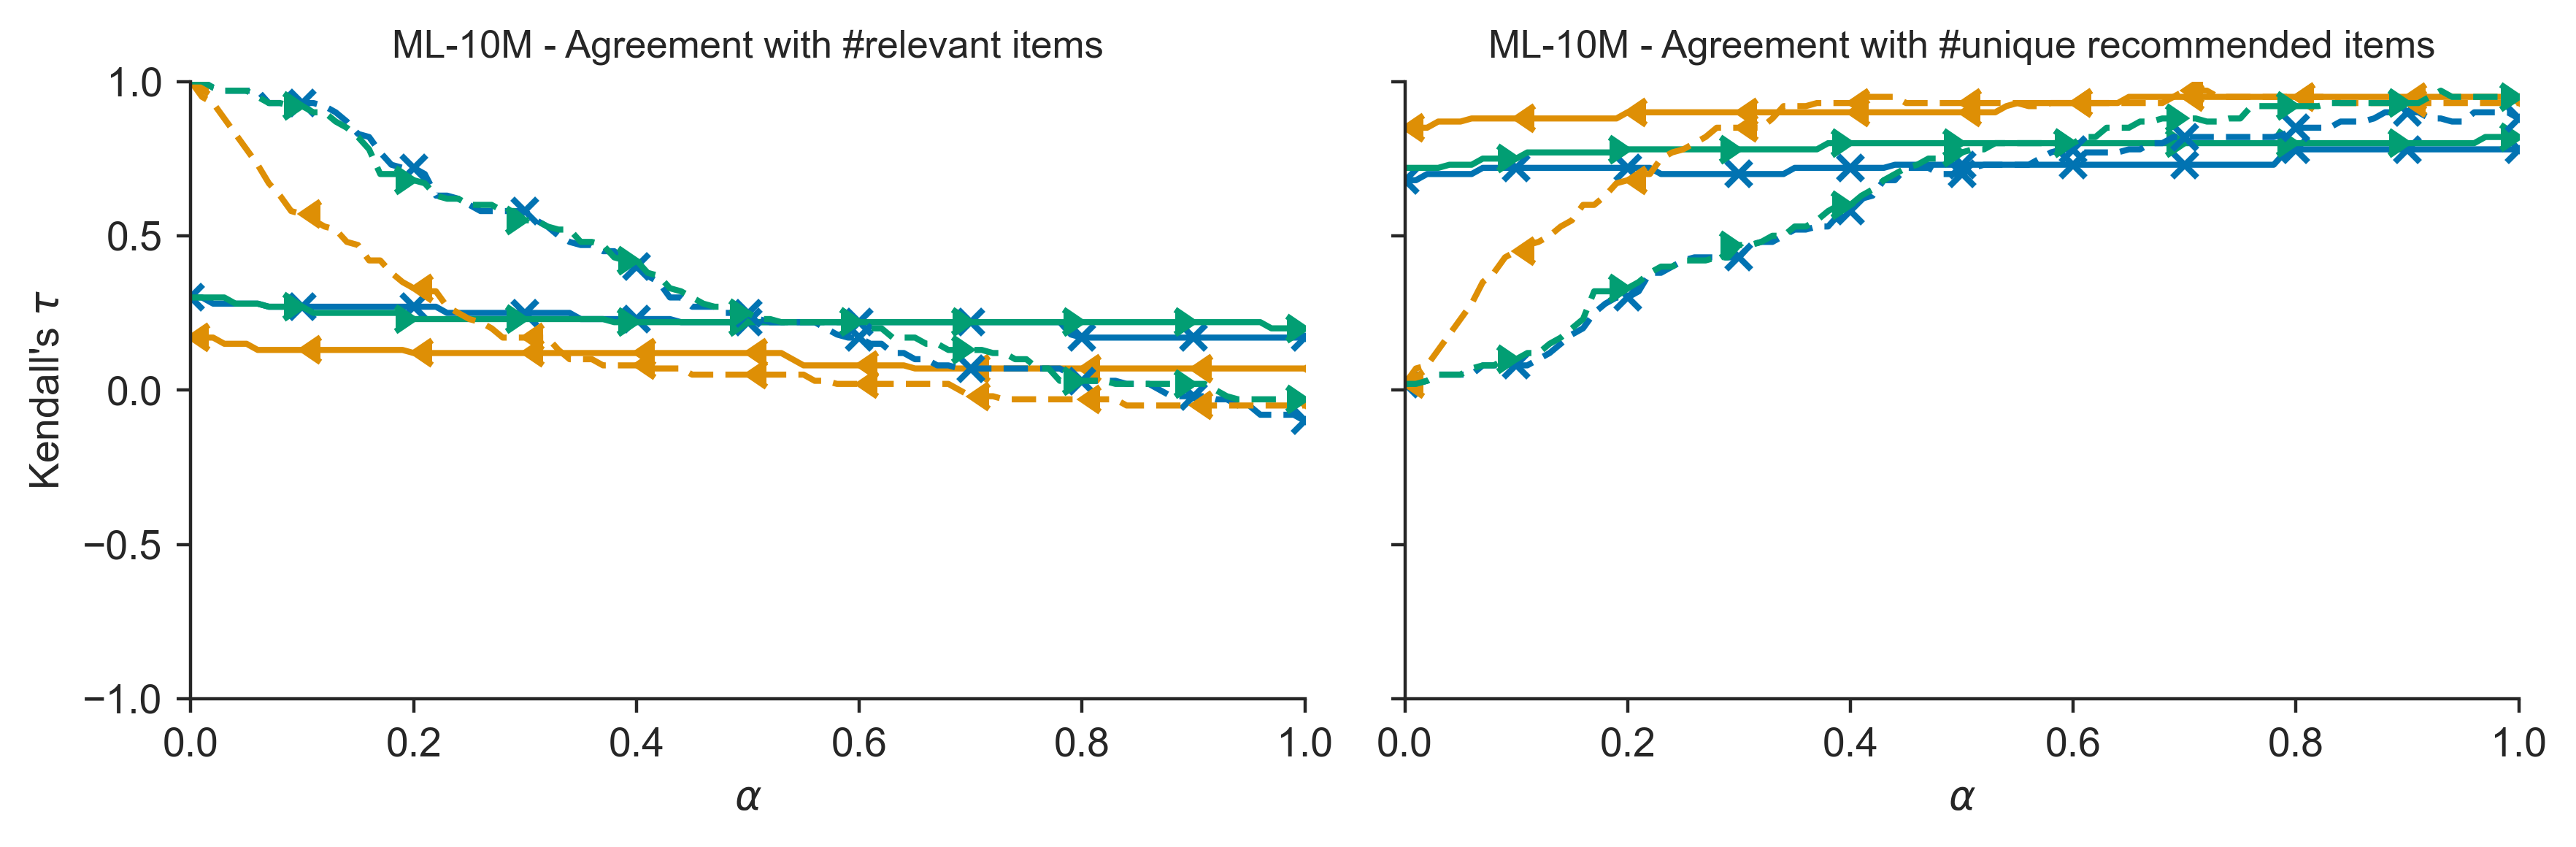

ML-20M


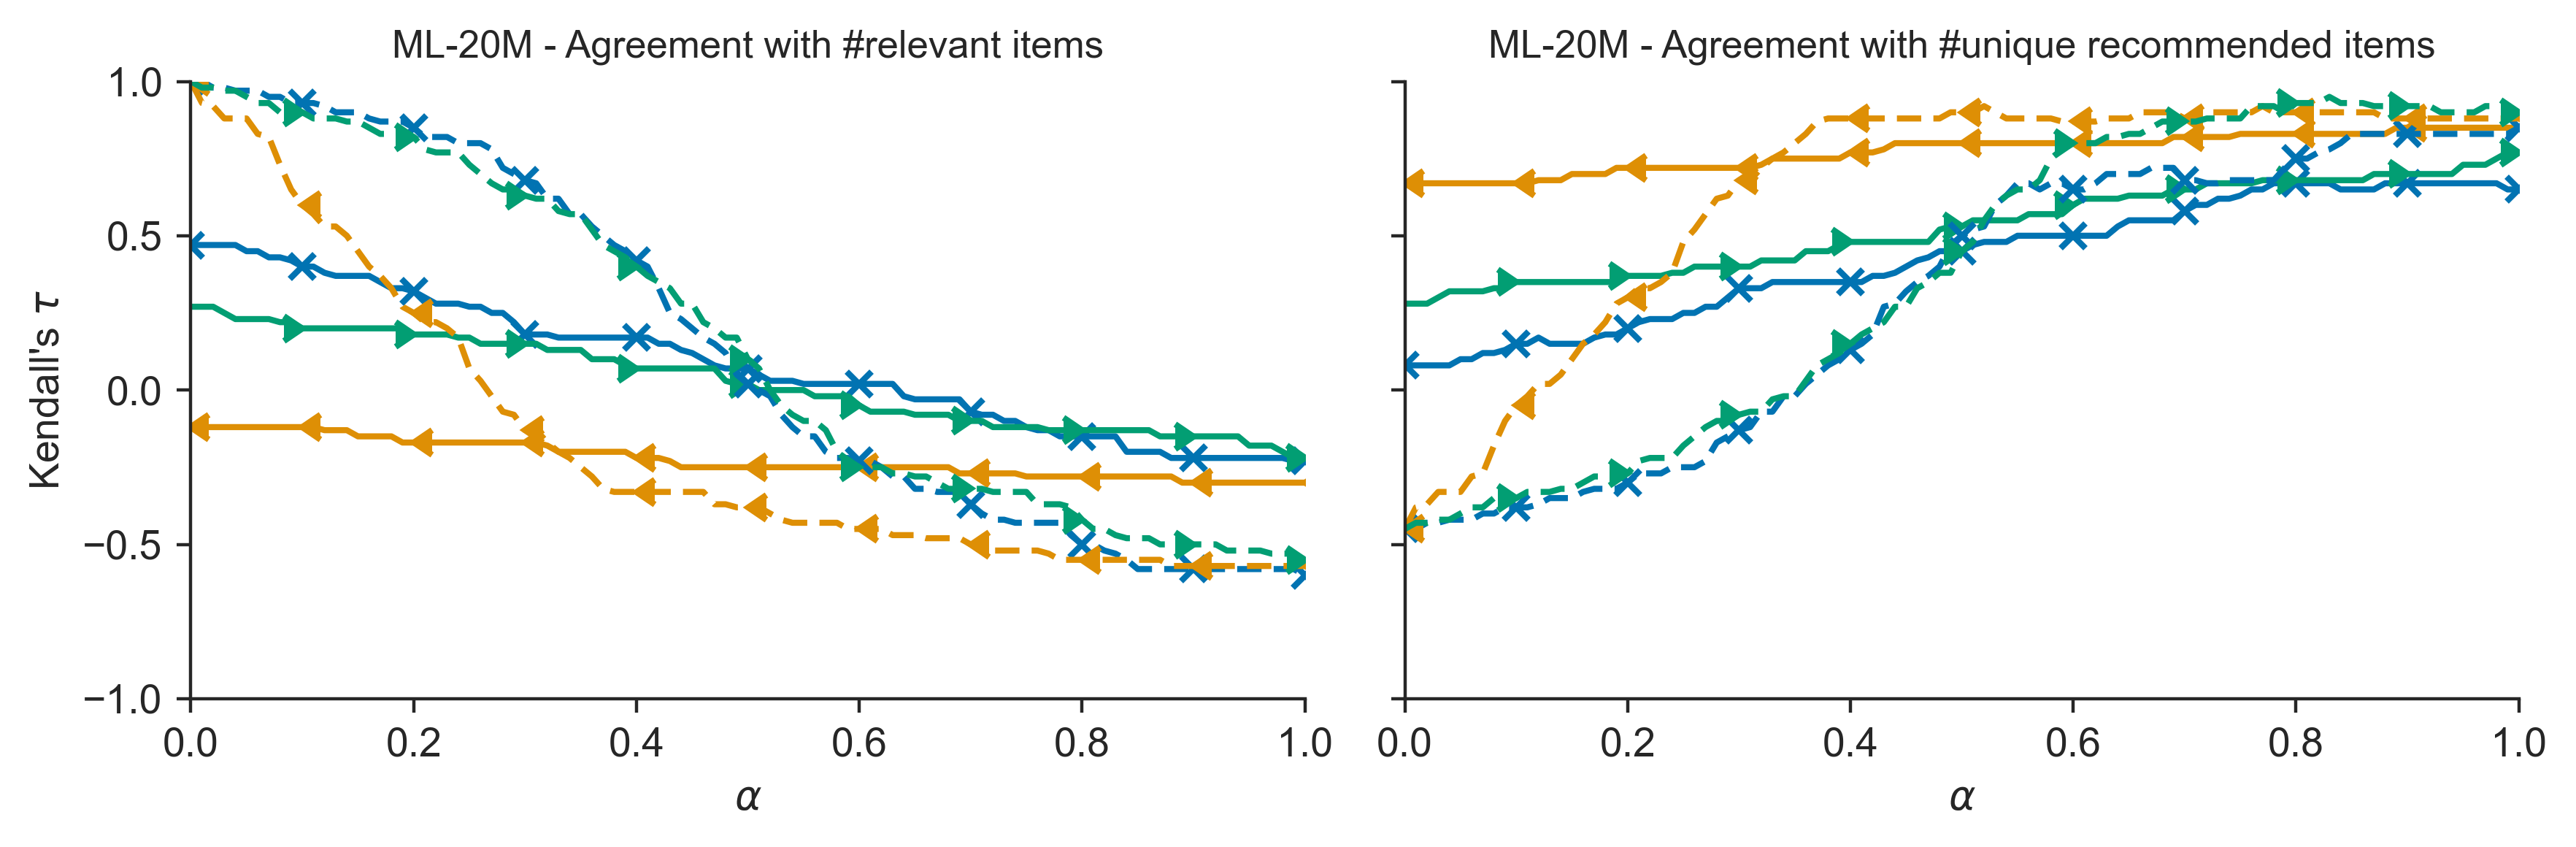

In [16]:
sns.set_style("ticks")

pattern = "^P-"

kwargs = dict(  x="alpha",
                palette="colorblind",
                hue="pair",
                style="pair",
                markers=["x"] * 1 + [4]*1 + [5]*1 + [6]*1,
                markersize=6,
                linewidth=1.5,
                markeredgewidth=1.5,
                markevery=10,
                mec=None)     

for dataset in list_dataset:
    print(dataset)
    fig, axes = plt.subplots(figsize=(9,3),ncols=2, sharey=True)

    the_corr = pd.read_csv(f"{experiment_name}/corr_simple_measure_{dataset}.csv", index_col=0)

    the_corr_sliced = the_corr.loc[:,["num_rel_items","num_unique_rec_items",]]
    the_corr_sliced.index = the_corr_sliced.index.str.replace("_our|_ori|_true","", regex=True)


    the_corr_dpfr = the_corr_sliced[the_corr_sliced.index.str.contains(".", regex=False)]
    the_corr_dpfr = separate_pair_alpha(the_corr_dpfr)

    the_corr_wavg = pd.read_csv(f"{experiment_name}/corr_simple_measure_wavg_{dataset}.csv", index_col=0)
    the_corr_wavg = separate_pair_alpha(the_corr_wavg)
    the_corr_wavg["pair"] = the_corr_wavg["pair"].str.replace("-wavg","")

    the_corr_dpfr = the_corr_dpfr[the_corr_dpfr.pair.str.contains(pattern, regex=True)]
    the_corr_wavg = the_corr_wavg[the_corr_wavg.pair.str.contains(pattern, regex=True)]


    sns.lineplot(data=the_corr_dpfr, y="num_rel_items", ax=axes[0], 
                legend=None,
                dashes=False,
                **kwargs
                )
    sns.lineplot(data=the_corr_dpfr, y="num_unique_rec_items", ax=axes[1],
                dashes=False,
                **kwargs
                )
    

    sns.lineplot(data=the_corr_wavg, y="num_rel_items", ax=axes[0], 
                legend=None,
                dashes=[(4,2)*2],
                **kwargs
                )
    sns.lineplot(data=the_corr_wavg, y="num_unique_rec_items", ax=axes[1],
                legend=None,
                dashes=[(4,2)*2],
                **kwargs
                )

    axes[0].set_title(f"{dataset} - Agreement with #relevant items", fontsize=9.5)
    axes[1].set_title(f"{dataset} - Agreement with #unique recommended items", fontsize=9.5)

    for ax in axes:
        ax.set_xlabel("$\\alpha$") 
        ax.set_ylabel("Kendall's $\\tau$") 

        #remove top and right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.set_xlim(0,1)
        ax.set_ylim(-1,1)

    if dataset in ["Lastfm"]:
        fig.legend(loc='upper center', bbox_to_anchor=(0.7, 1.295), title="measure pair", ncol = 4)

        # add legend: measure type DPFR and w-avg, and this should be before the measure pair

        custom_lines = [
            Line2D([0], [0], color='black', linestyle='-'),
            Line2D([0], [0], color='black', linestyle='--')
        ]

        # Add legend with custom handles
        fig.legend(
            custom_lines, ['DPFR', 'weighted-avg'], loc='upper left', title='evaluation measure',
            bbox_to_anchor=(0.15, 1.295),
            ncol=2
        )

    ax.legend_.remove()

    plt.tight_layout()
    plt.savefig(f"{experiment_name}/dpfr_wavg_simple_measure_{dataset}_P-pairs.pdf", bbox_inches='tight', dpi=600)    
    plt.show()

## All Measure Pairs

Lastfm


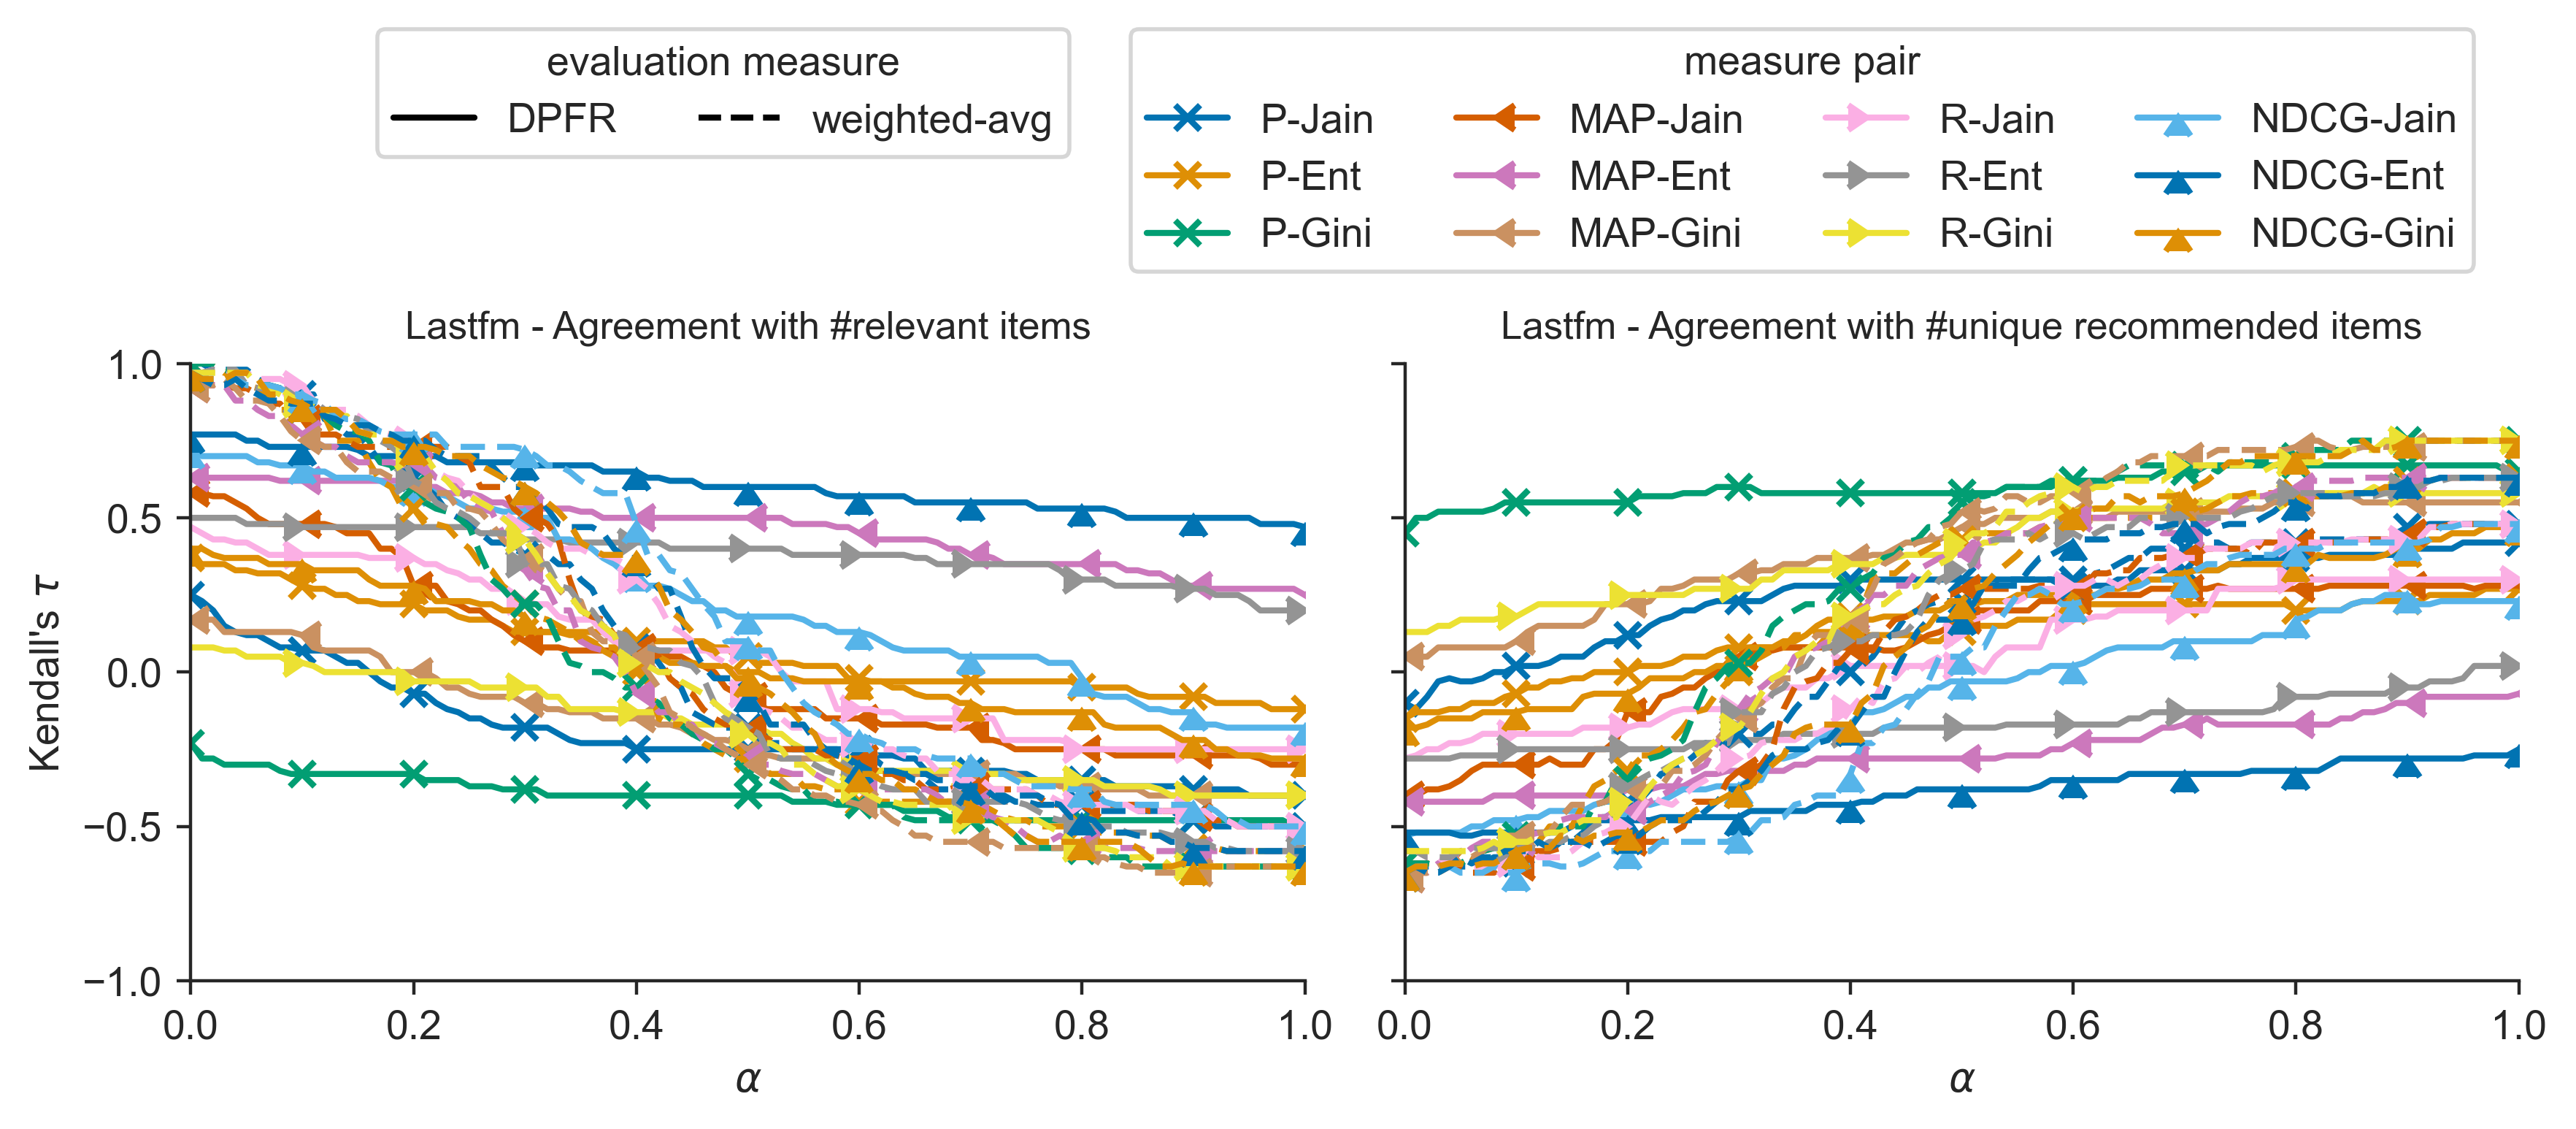

Amazon-lb


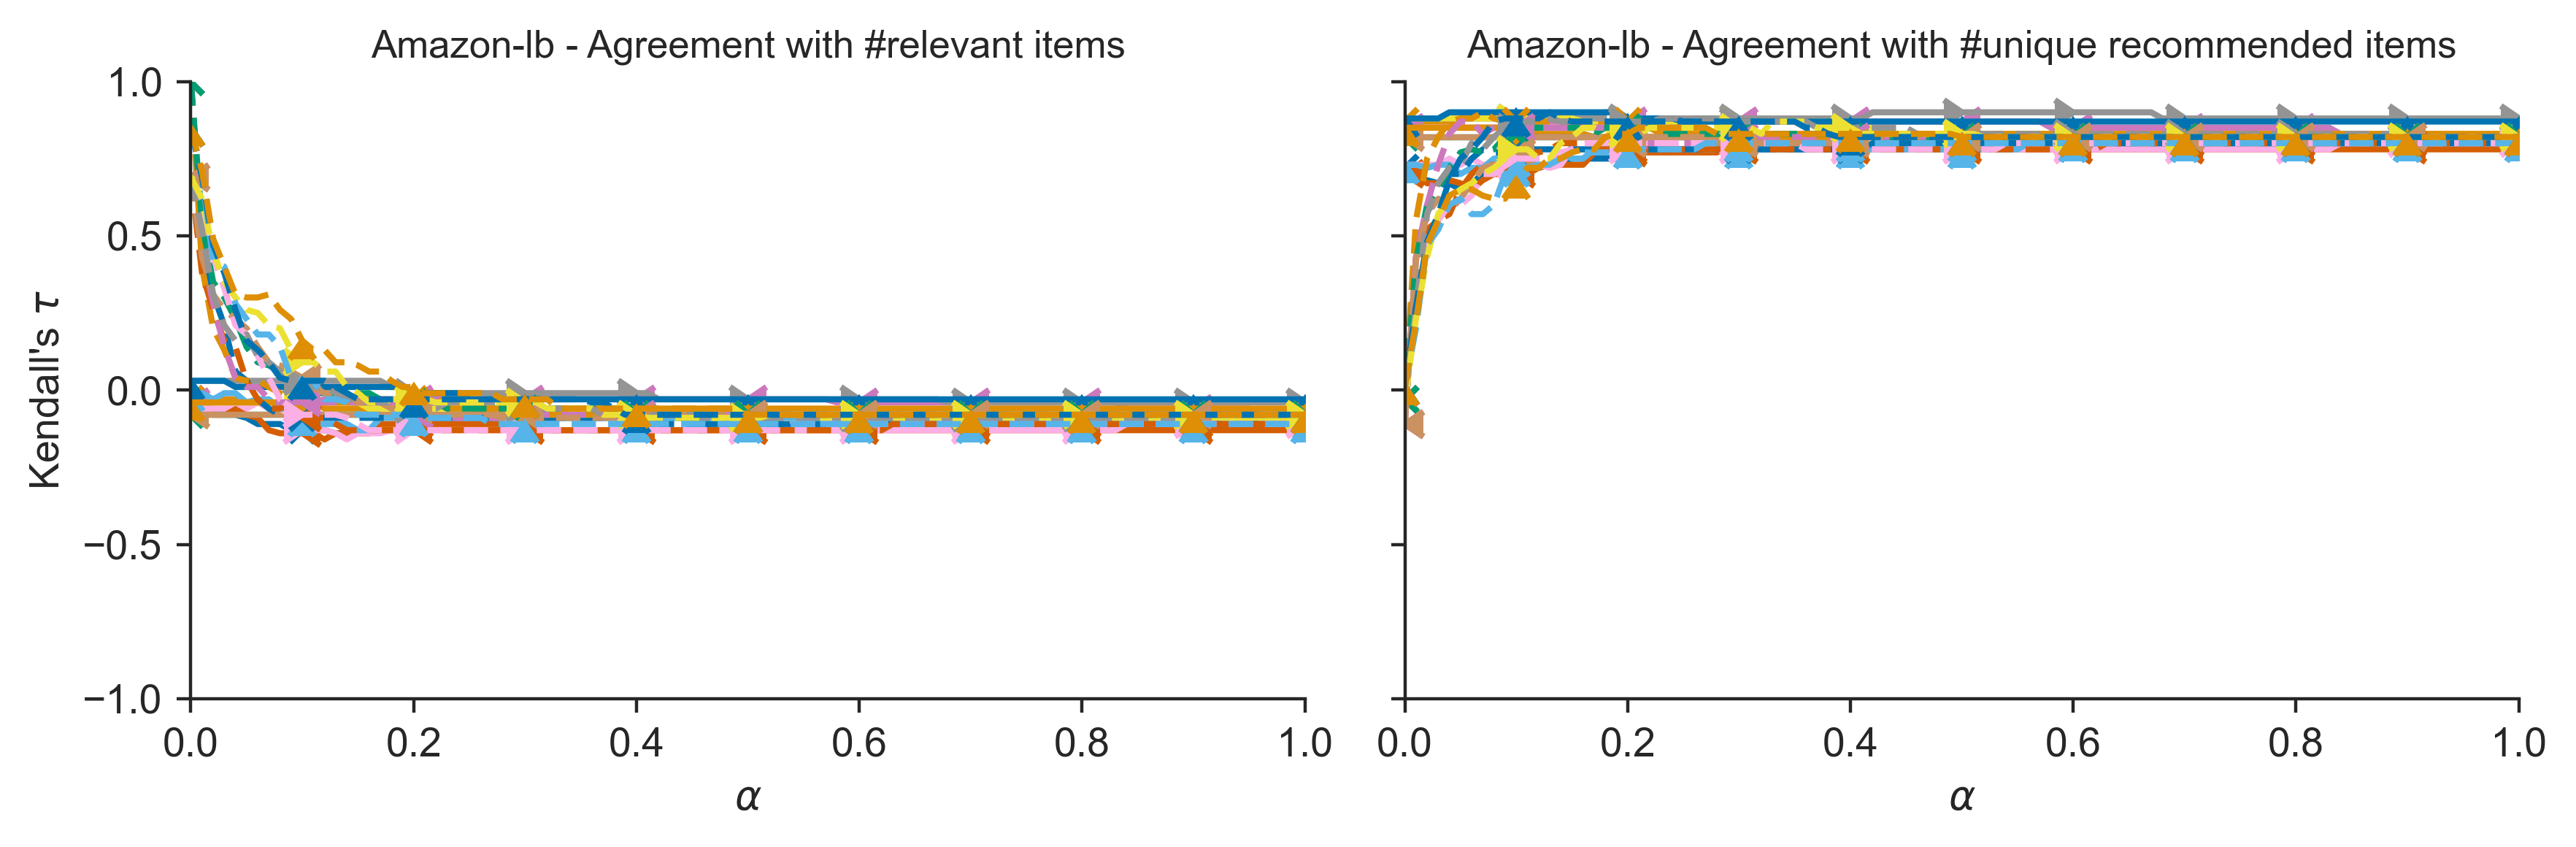

QK-video


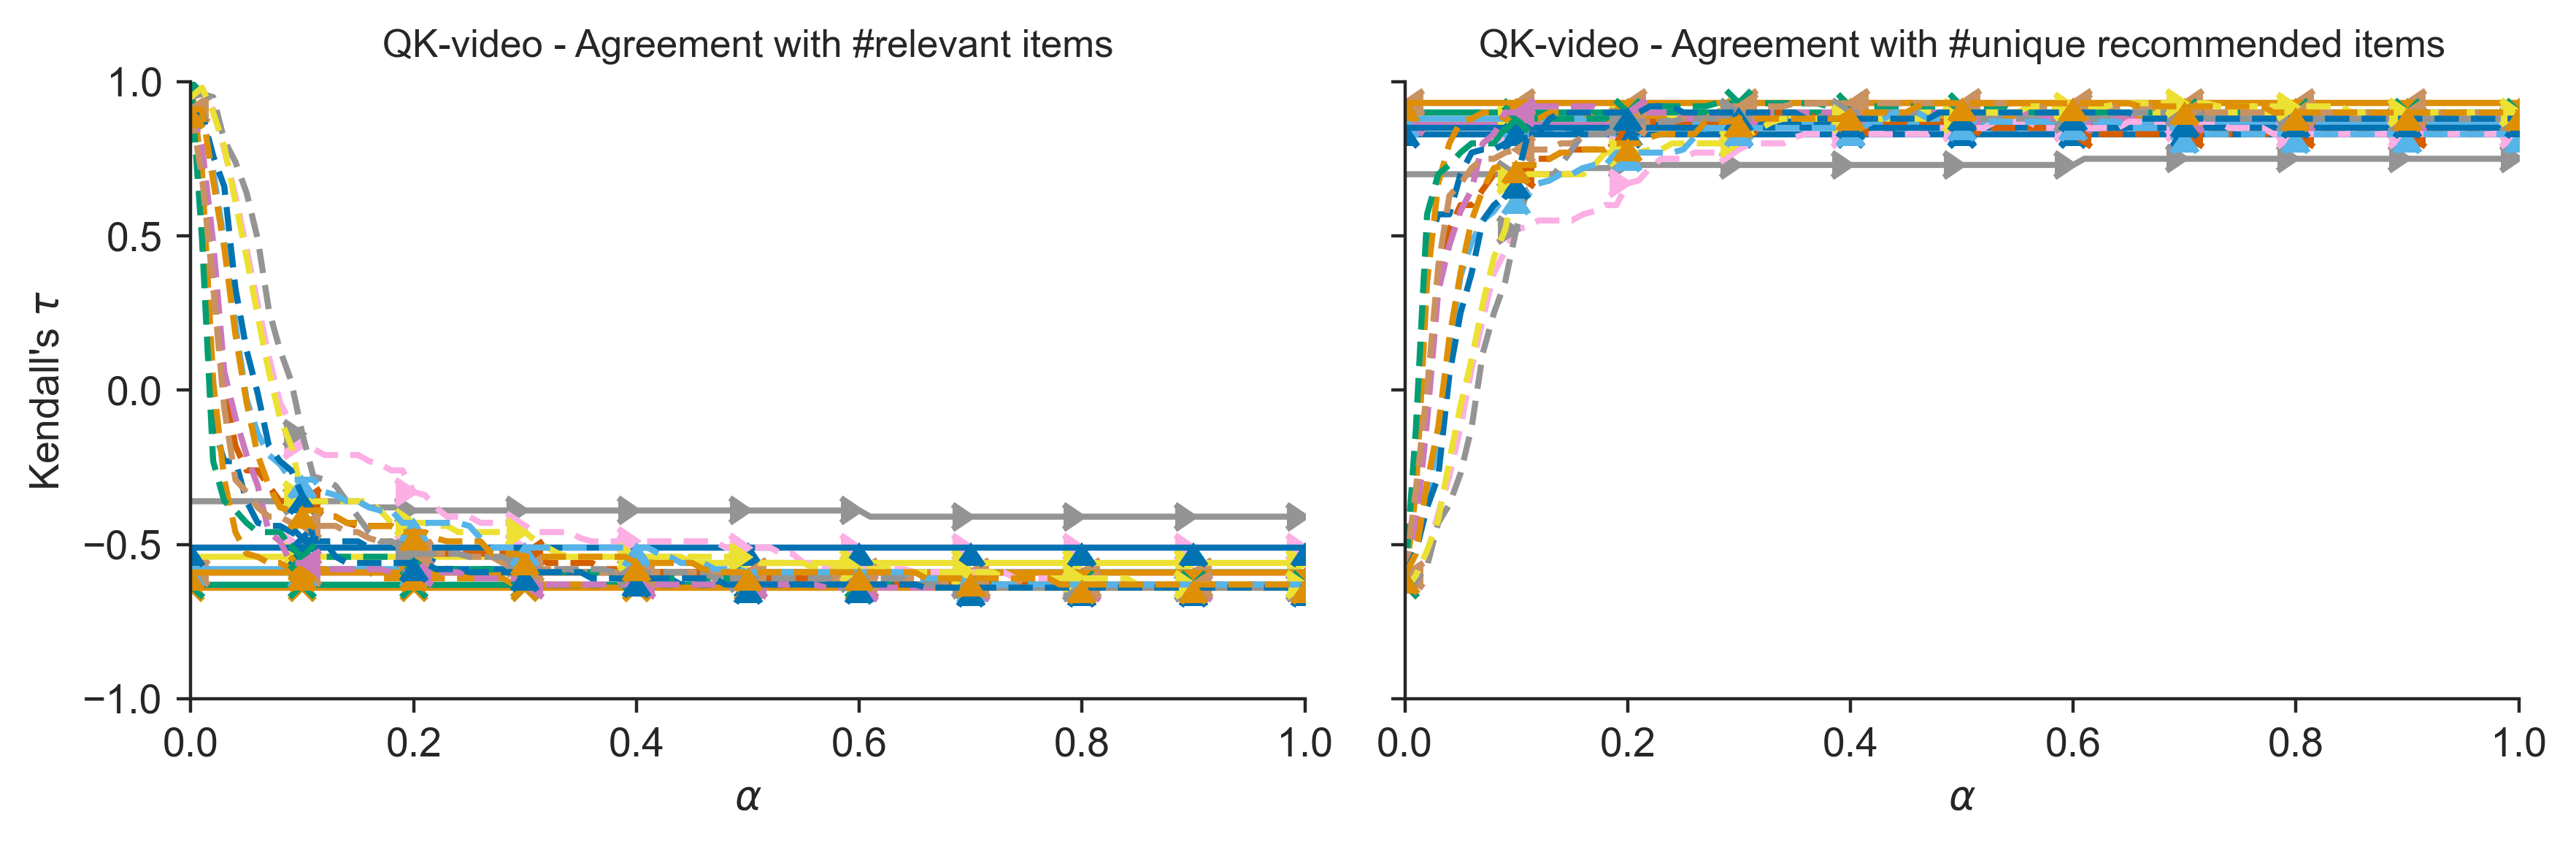

Jester


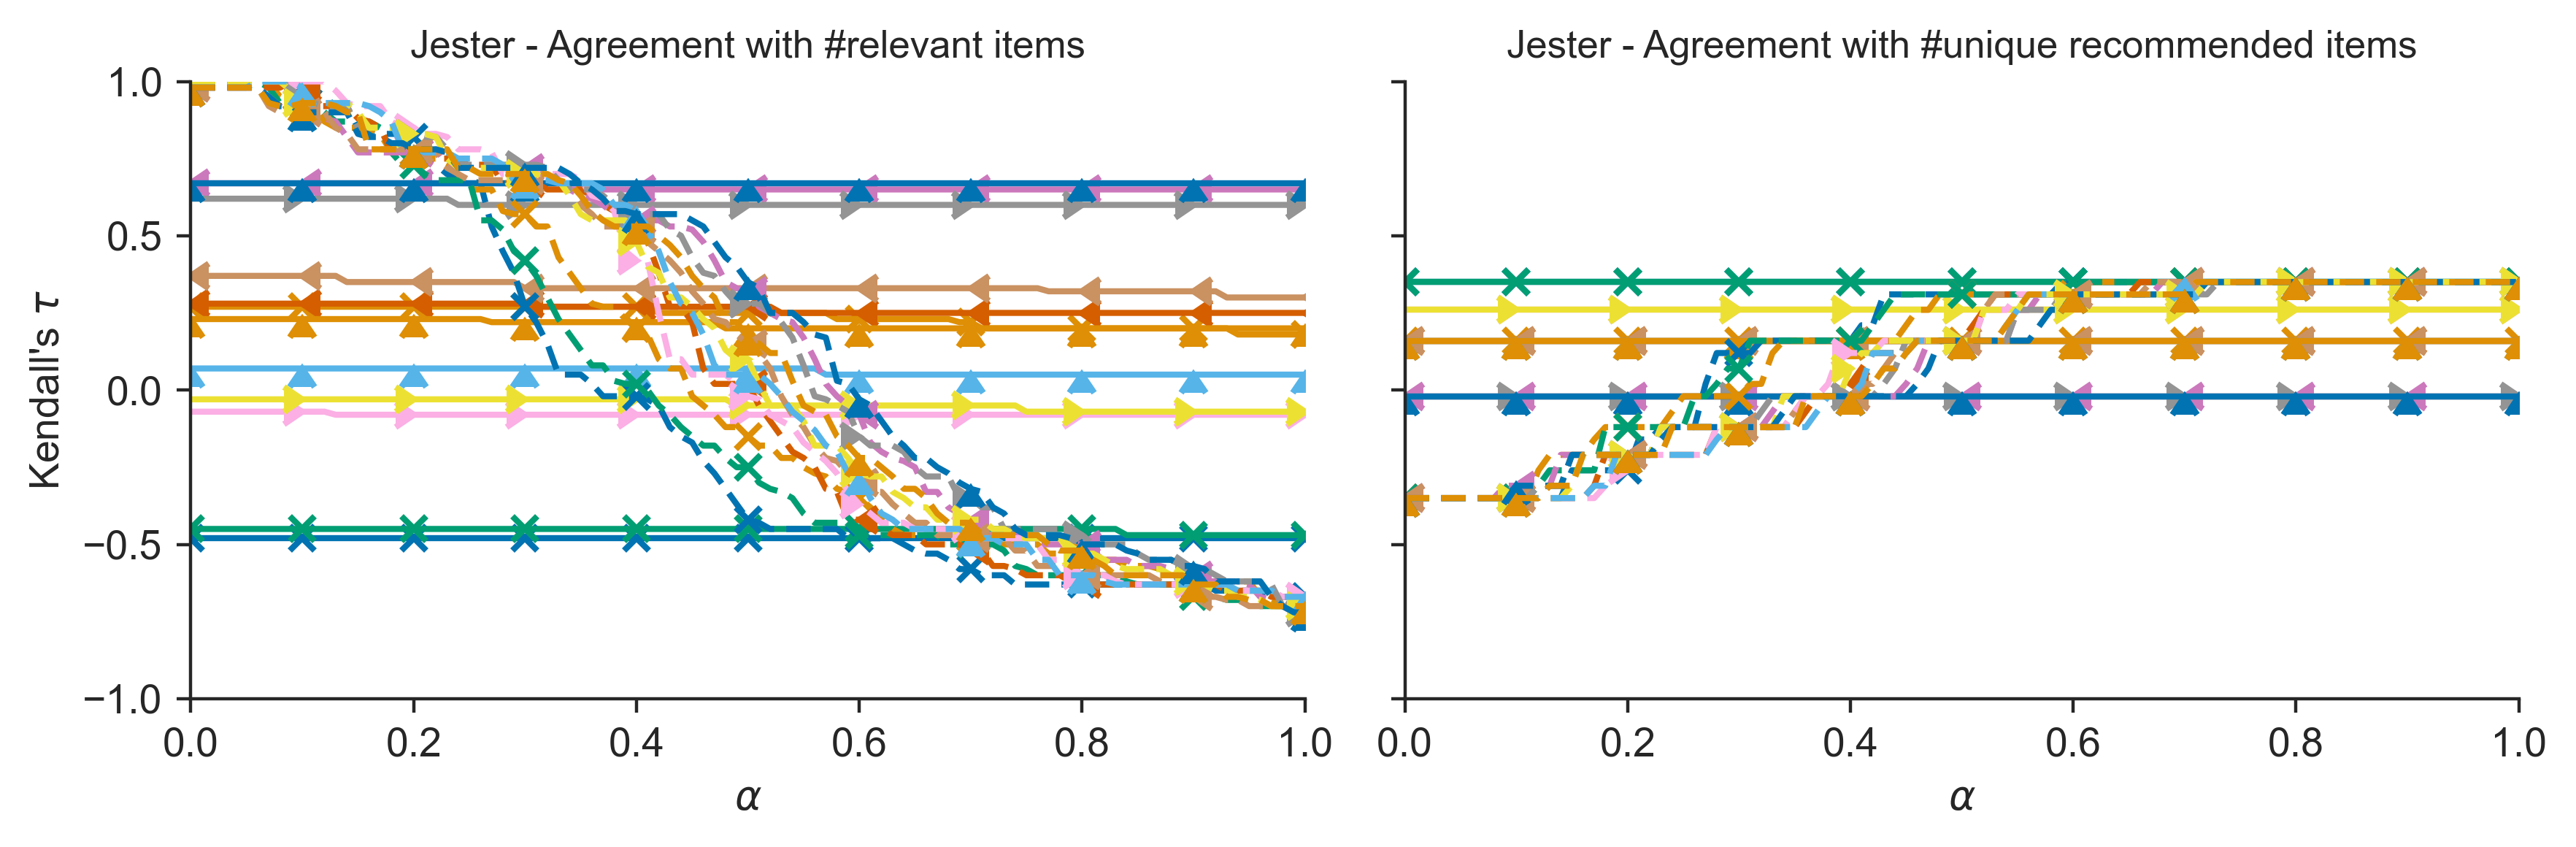

ML-10M


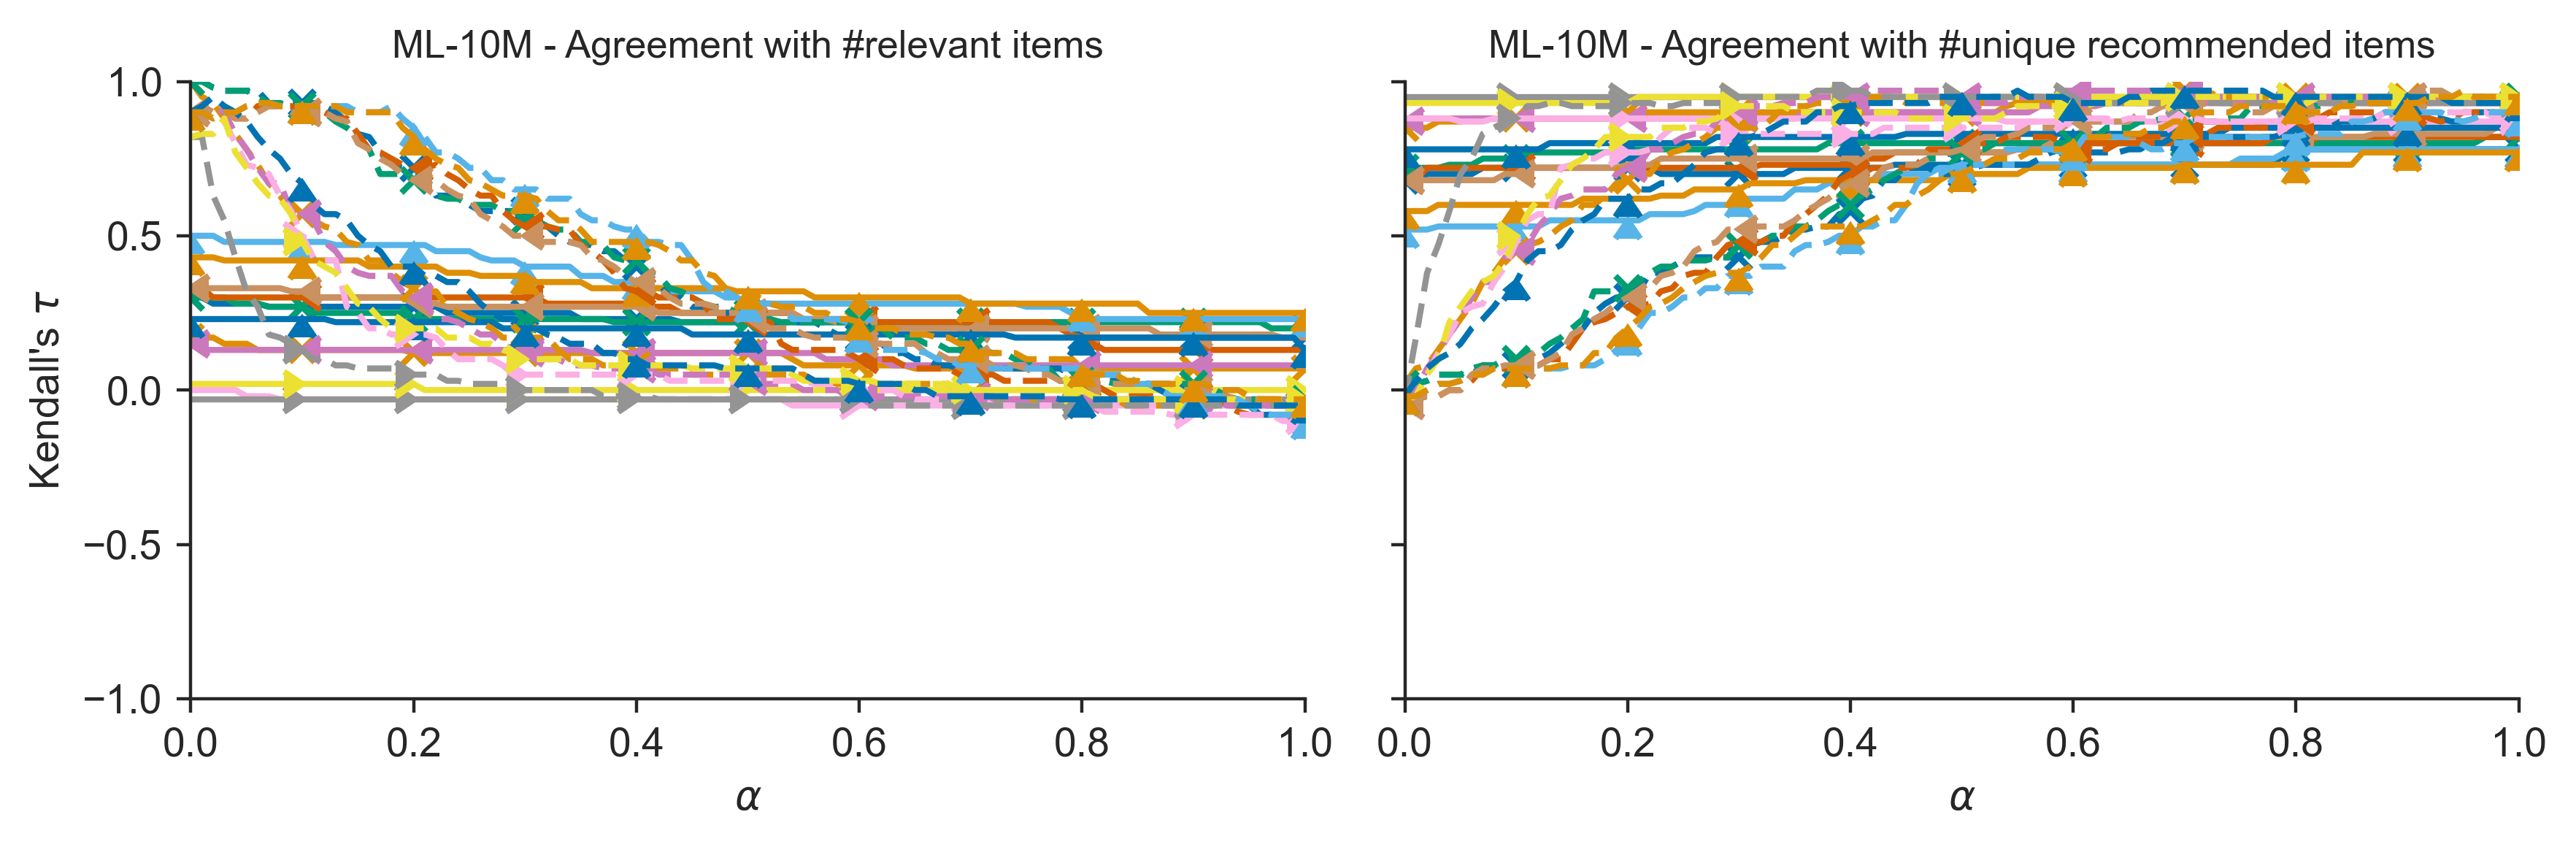

ML-20M


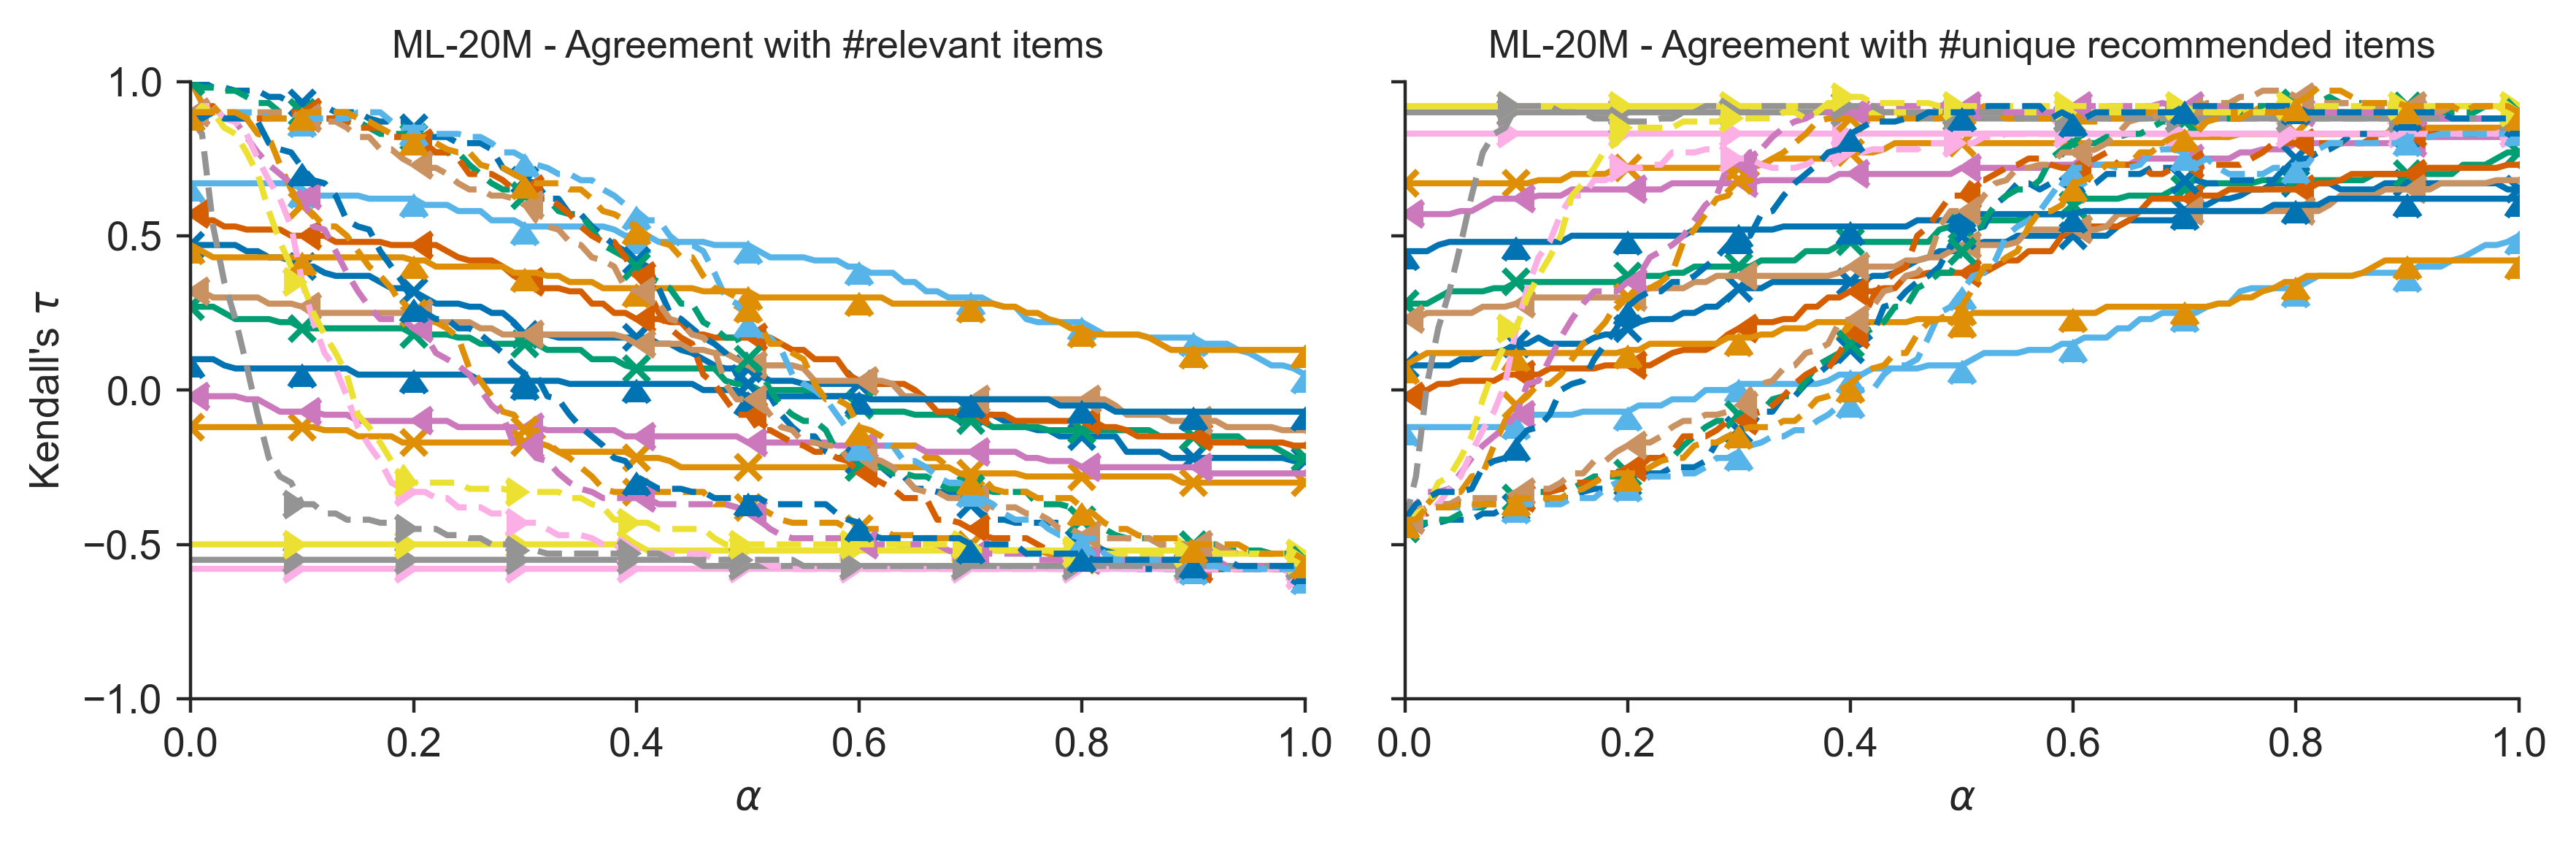

In [17]:
sns.set_style("ticks")

kwargs = dict(  x="alpha",
                palette="colorblind",
                hue="pair",
                style="pair",
                markers=["x"] * 3 + [4]*3 + [5]*3 + [6]*3,
                markersize=6,
                linewidth=1.5,
                markeredgewidth=1.5,
                markevery=10,
                mec=None)     

for dataset in list_dataset:
    print(dataset)
    fig, axes = plt.subplots(figsize=(9,3),ncols=2, sharey=True)

    the_corr = pd.read_csv(f"{experiment_name}/corr_simple_measure_{dataset}.csv", index_col=0)

    the_corr_sliced = the_corr.loc[:,["num_rel_items","num_unique_rec_items",]]
    the_corr_sliced.index = the_corr_sliced.index.str.replace("_our|_ori|_true","", regex=True)


    the_corr_dpfr = the_corr_sliced[the_corr_sliced.index.str.contains(".", regex=False)]
    the_corr_dpfr = separate_pair_alpha(the_corr_dpfr)

    the_corr_wavg = pd.read_csv(f"{experiment_name}/corr_simple_measure_wavg_{dataset}.csv", index_col=0)
    the_corr_wavg = separate_pair_alpha(the_corr_wavg)
    the_corr_wavg["pair"] = the_corr_wavg["pair"].str.replace("-wavg","")


    sns.lineplot(data=the_corr_dpfr, y="num_rel_items", ax=axes[0], 
                legend=None,
                dashes=False,
                **kwargs
                )
    sns.lineplot(data=the_corr_dpfr, y="num_unique_rec_items", ax=axes[1],
                dashes=False,
                **kwargs
                )
    

    sns.lineplot(data=the_corr_wavg, y="num_rel_items", ax=axes[0], 
                legend=None,
                dashes=[(4,2)*2],
                **kwargs
                )
    sns.lineplot(data=the_corr_wavg, y="num_unique_rec_items", ax=axes[1],
                legend=None,
                dashes=[(4,2)*2],
                **kwargs
                )

    axes[0].set_title(f"{dataset} - Agreement with #relevant items", fontsize=9.5)
    axes[1].set_title(f"{dataset} - Agreement with #unique recommended items", fontsize=9.5)

    for ax in axes:
        ax.set_xlabel("$\\alpha$") 
        ax.set_ylabel("Kendall's $\\tau$") 

        #remove top and right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.set_xlim(0,1)
        ax.set_ylim(-1,1)

    if dataset in ["Lastfm"]:
        fig.legend(loc='upper center', bbox_to_anchor=(0.7, 1.295), title="measure pair", ncol = 4)

        # add legend: measure type DPFR and w-avg, and this should be before the measure pair

        custom_lines = [
            Line2D([0], [0], color='black', linestyle='-'),
            Line2D([0], [0], color='black', linestyle='--')
        ]

        # Add legend with custom handles
        fig.legend(
            custom_lines, ['DPFR', 'weighted-avg'], loc='upper left', title='evaluation measure',
            bbox_to_anchor=(0.15, 1.295),
            ncol=2
        )

    ax.legend_.remove()

    plt.tight_layout()
    plt.savefig(f"{experiment_name}/dpfr_wavg_simple_measure_{dataset}.pdf", bbox_inches='tight', dpi=600)    
    plt.show()